# Analysis on World Happiness Report

The world happiness report is an annual report that is published by the United Nations Sustainable Development Solutions Network. This survey was formerly taken in the year 2012. The world happiness report records the happiness score for 156 countries based on various attributes.

The survey used the Gallup World Poll that asked people to vote on three indicators:

1. Life evaluations: The respondents rate their life on a ladder, with steps numbered from 0 at bottom to 10 at the top.

2. Positive emotions: People respond in binary term (0 and 1) on three measures: "Happiness","Laugh","Enjoyment".

3. Negative emotions: Conducted on three measures of "worry","sadness" and "anger"



The report also took into account data related to:

GDP per capita

Healthy life expectancy

Social support

Freedom to make life choices

Generosity

Corruption Perception


March 20 was the designated as the world Happiness Day by the UN General Assembly in 2012.

In this notebook,I have used the "World Happiness" dataset for the year 2016-2020

## 1. Importing or loading the Libraries:

### Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
print("Libraries are imported.")

Libraries are imported.


## 2. Importing the dataset:

#### First, lets see what kind of data we have and how many rows and columns are there in each dataset...

### Importing the data of year 2016

In [2]:
data_2016 = pd.read_csv(r"C:\Users\nikit\Downloads\archive (5)\2016.csv")

In [3]:
data_2016.head(10)    #It gives us first 5 records of dataset by default 
                      #and we can specify a number of records we want.

Country                     Region  Happiness Rank  Happiness Score  \
0      Denmark             Western Europe               1            7.526   
1  Switzerland             Western Europe               2            7.509   
2      Iceland             Western Europe               3            7.501   
3       Norway             Western Europe               4            7.498   
4      Finland             Western Europe               5            7.413   
5       Canada              North America               6            7.404   
6  Netherlands             Western Europe               7            7.339   
7  New Zealand  Australia and New Zealand               8            7.334   
8    Australia  Australia and New Zealand               9            7.313   
9       Sweden             Western Europe              10            7.291   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   
5                      7.335                      7.473   
6                      7.284                      7.394   
7                      7.264                      7.404   
8                      7.241                      7.385   
9                      7.227                      7.355   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   
5                   1.44015  1.09610                   0.82760  0.57370   
6                   1.46468  1.02912                   0.81231  0.55211   
7                   1.36066  1.17278                   0.83096  0.58147   
8                   1.44443  1.10476                   0.85120  0.56837   
9                   1.45181  1.08764                   0.83121  0.58218   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596  
5                        0.31329     0.44834            2.70485  
6                        0.29927     0.47416            2.70749  
7                        0.41904     0.49401            2.47553  
8                        0.32331     0.47407            2.54650  
9                        0.40867     0.38254            2.54734

In [4]:
data_2016.tail()   #It gives last 5 records of dataset by default

Country                           Region  Happiness Rank  \
152        Benin               Sub-Saharan Africa             153   
153  Afghanistan                    Southern Asia             154   
154         Togo               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
152            3.484                      3.404                      3.564   
153            3.360                      3.288                      3.432   
154            3.303                      3.192                      3.414   
155            3.069                      2.936                      3.202   
156            2.905                      2.732                      3.078   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
152                   0.39499  0.10419                   0.21028  0.39747   
153                   0.38227  0.11037                   0.17344  0.16430   
154                   0.28123  0.00000                   0.24811  0.34678   
155                   0.74719  0.14866                   0.62994  0.06912   
156                   0.06831  0.23442                   0.15747  0.04320   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
152                        0.06681     0.20180            2.10812  
153                        0.07112     0.31268            2.14558  
154                        0.11587     0.17517            2.13540  
155                        0.17233     0.48397            0.81789  
156                        0.09419     0.20290            2.10404

In [5]:
#Getting the number of rows and columns

print(f"There are {data_2016.shape[0]} rows and {data_2016.shape[1]} columns in the 2016 dataset.") 

There are 157 rows and 13 columns in the 2016 dataset.


In [6]:
#we have 10 regions in this dataset

print(f"The number of regions in our dataset is: {data_2016['Region'].nunique()}")

The number of regions in our dataset is: 10


In [7]:
# Columns in the dataset

for col in data_2016.columns:
    print(col)

Country
Region
Happiness Rank
Happiness Score
Lower Confidence Interval
Upper Confidence Interval
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual


In [8]:
#Display the number of rows and columns and other info

data_2016.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [9]:
len(data_2016) #Get the number of rows

157

In [10]:
len(data_2016.columns)  #Get the number of columns

13

In [11]:
data_2016.size  #Get the number of elements

2041

In [12]:
data_2016.describe()  #calculating some statistical data like percentile, mean and 
                      #std of the numerical values of the DataFrame

Happiness Rank  Happiness Score  Lower Confidence Interval  \
count      157.000000       157.000000                 157.000000   
mean        78.980892         5.382185                   5.282395   
std         45.466030         1.141674                   1.148043   
min          1.000000         2.905000                   2.732000   
25%         40.000000         4.404000                   4.327000   
50%         79.000000         5.314000                   5.237000   
75%        118.000000         6.269000                   6.154000   
max        157.000000         7.526000                   7.460000   

       Upper Confidence Interval  Economy (GDP per Capita)      Family  \
count                 157.000000                157.000000  157.000000   
mean                    5.481975                  0.953880    0.793621   
std                     1.136493                  0.412595    0.266706   
min                     3.078000                  0.000000    0.000000   
25%                     4.465000                  0.670240    0.641840   
50%                     5.419000                  1.027800    0.841420   
75%                     6.434000                  1.279640    1.021520   
max                     7.669000                  1.824270    1.183260   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                157.000000  157.000000                     157.000000   
mean                   0.557619    0.370994                       0.137624   
std                    0.229349    0.145507                       0.111038   
min                    0.000000    0.000000                       0.000000   
25%                    0.382910    0.257480                       0.061260   
50%                    0.596590    0.397470                       0.105470   
75%                    0.729930    0.484530                       0.175540   
max                    0.952770    0.608480                       0.505210   

       Generosity  Dystopia Residual  
count  157.000000         157.000000  
mean     0.242635           2.325807  
std      0.133756           0.542220  
min      0.000000           0.817890  
25%      0.154570           2.031710  
50%      0.222450           2.290740  
75%      0.311850           2.664650  
max      0.819710           3.837720

In [13]:
data_2016.isnull().sum()   #returns the number of missing values in the data set
                           #Check that, is there any null value.

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

####  The output for year 2016 shows that we have 157 entries with 13 columns. The data has no missing values here. Also, the columns' data types look correct already. 

In [14]:
# Countries with their happiness rank

data_2016[['Country','Happiness Rank']].head(10)

Country  Happiness Rank
0      Denmark               1
1  Switzerland               2
2      Iceland               3
3       Norway               4
4      Finland               5
5       Canada               6
6  Netherlands               7
7  New Zealand               8
8    Australia               9
9       Sweden              10

### Importing the data of year 2017

In [15]:
data_2017 = pd.read_csv("C:\\Users\\nikit\\Downloads\\archive (1)\\2017.csv")

In [16]:
data_2017.head(10)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   
5  Netherlands               6            7.377      7.427426     7.326574   
6       Canada               7            7.316      7.384403     7.247597   
7  New Zealand               8            7.314      7.379510     7.248490   
8       Sweden               9            7.284      7.344095     7.223905   
9    Australia              10            7.284      7.356651     7.211349   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   
5                  1.503945  1.428939                  0.810696  0.585384   
6                  1.479204  1.481349                  0.834558  0.611101   
7                  1.405706  1.548195                  0.816760  0.614062   
8                  1.494387  1.478162                  0.830875  0.612924   
9                  1.484415  1.510042                  0.843887  0.601607   

   Generosity  ...  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0    0.362012  ...          NaN          NaN          NaN          NaN   
1    0.355280  ...          NaN          NaN          NaN          NaN   
2    0.475540  ...          NaN          NaN          NaN          NaN   
3    0.290549  ...          NaN          NaN          NaN          NaN   
4    0.245483  ...          NaN          NaN          NaN          NaN   
5    0.470490  ...          NaN          NaN          NaN          NaN   
6    0.435540  ...          NaN          NaN          NaN          NaN   
7    0.500005  ...          NaN          NaN          NaN          NaN   
8    0.385399  ...          NaN          NaN          NaN          NaN   
9    0.477699  ...          NaN          NaN          NaN          NaN   

   Unnamed: 24  Unnamed: 25  Unnamed: 26  Unnamed: 27  Unnamed: 28  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   
5          NaN          NaN          NaN          NaN          NaN   
6          NaN          NaN          NaN          NaN          NaN   
7          NaN          NaN          NaN          NaN          NaN   
8          NaN          NaN          NaN          NaN          NaN   
9          NaN          NaN          NaN          NaN          NaN   

   Dystopia.Residual  
0           2.277027  
1           2.313707  
2           2.322715  
3           2.276716  
4           2.430182  
5           2.294804  
6           2.187264  
7           2.046456  
8           2.097538  
9           2.065211  

[10 rows x 30 columns]

In [17]:
data_2017.shape

(155, 30)

In [18]:
# Removes the columns that we will not use

data_2017 = data_2017.drop(['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17',
                            'Unnamed: 18','Unnamed: 19','Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
                            'Unnamed: 24', 'Unnamed: 25','Unnamed: 26','Unnamed: 27', 'Unnamed: 28','Dystopia.Residual'],axis=1)

In [19]:
data_2017.head(10)

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   
5  Netherlands               6            7.377      7.427426     7.326574   
6       Canada               7            7.316      7.384403     7.247597   
7  New Zealand               8            7.314      7.379510     7.248490   
8       Sweden               9            7.284      7.344095     7.223905   
9    Australia              10            7.284      7.356651     7.211349   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   
5                  1.503945  1.428939                  0.810696  0.585384   
6                  1.479204  1.481349                  0.834558  0.611101   
7                  1.405706  1.548195                  0.816760  0.614062   
8                  1.494387  1.478162                  0.830875  0.612924   
9                  1.484415  1.510042                  0.843887  0.601607   

   Generosity  Trust..Government.Corruption.  
0    0.362012                       0.315964  
1    0.355280                       0.400770  
2    0.475540                       0.153527  
3    0.290549                       0.367007  
4    0.245483                       0.382612  
5    0.470490                       0.282662  
6    0.435540                       0.287372  
7    0.500005                       0.382817  
8    0.385399                       0.384399  
9    0.477699                       0.301184

#### So, we have removed unwanted columns which we will not use.

In [20]:
data_2017.shape

(155, 11)

In [21]:
#Getting the number of rows and columns

print(f"There are {data_2017.shape[0]} rows and {data_2017.shape[1]} columns in the 2017 dataset.") 

There are 155 rows and 11 columns in the 2017 dataset.


In [22]:
data_2017.isnull().sum() 

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
dtype: int64

In [23]:
# Countries with happiness rank

data_2017[['Country','Happiness.Rank']].head(10)

Country  Happiness.Rank
0       Norway               1
1      Denmark               2
2      Iceland               3
3  Switzerland               4
4      Finland               5
5  Netherlands               6
6       Canada               7
7  New Zealand               8
8       Sweden               9
9    Australia              10

In [24]:
data_2017.describe()

Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  
count  155.000000  155.000000                     155.000000  
mean     0.408786    0.246883                       0.123120  
std      0.149997    0.134780                       0.101661  
min      0.000000    0.000000                       0.000000  
25%      0.303677    0.154106                       0.057271  
50%      0.437454    0.231538                       0.089848  
75%      0.516561    0.323762                       0.153296  
max      0.658249    0.838075                       0.464308

#### The output for year 2017 shows that we have 155 entries with 11 columns. The data has no missing values here. Also, the columns' data types look correct already. 

### Importing the data of year 2018

In [25]:
data_2018 = pd.read_csv("C:\\Users\\nikit\\Downloads\\archive (1)\\2018.csv")

In [26]:
data_2018.head(10)

Country or region  Overall rank  Score  GDP per capita  Social support  \
0           Finland             1  7.632           1.305           1.592   
1            Norway             2  7.594           1.456           1.582   
2           Denmark             3  7.555           1.351           1.590   
3           Iceland             4  7.495           1.343           1.644   
4       Switzerland             5  7.487           1.420           1.549   
5       Netherlands             6  7.441           1.361           1.488   
6            Canada             7  7.328           1.330           1.532   
7       New Zealand             8  7.324           1.268           1.601   
8            Sweden             9  7.314           1.355           1.501   
9         Australia            10  7.272           1.340           1.573   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   
5                    0.878                         0.638       0.333   
6                    0.896                         0.653       0.321   
7                    0.876                         0.669       0.365   
8                    0.913                         0.659       0.285   
9                    0.910                         0.647       0.361   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357  
5                      0.295  
6                      0.291  
7                      0.389  
8                      0.383  
9                      0.302

In [27]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Overall rank                  156 non-null    int64  
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [28]:
data_2018.isnull().sum() 

Country or region               0
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

#### Here, we can see that there is only one null value is present in Perceptions of  corruption column. Otherwise, all values are filled.

In [29]:
data_2018.shape

(156, 9)

In [30]:
#Getting the number of rows and columns

print(f"There are {data_2018.shape[0]} rows and {data_2018.shape[1]} columns in the 2018 dataset.") 

There are 156 rows and 9 columns in the 2018 dataset.


In [31]:
# Countries with happiness rank

data_2018[['Country or region','Overall rank']].head(10)

Country or region  Overall rank
0           Finland             1
1            Norway             2
2           Denmark             3
3           Iceland             4
4       Switzerland             5
5       Netherlands             6
6            Canada             7
7       New Zealand             8
8            Sweden             9
9         Australia            10

### Importing data of the year 2019

In [32]:
data_2019 = pd.read_csv("C:\\Users\\nikit\\Downloads\\archive (1)\\2019.csv")

In [33]:
data_2019.head(10)

Country or region  Overall rank  Score  GDP per capita  Social support  \
0           Finland             1  7.769           1.340           1.587   
1           Denmark             2  7.600           1.383           1.573   
2            Norway             3  7.554           1.488           1.582   
3           Iceland             4  7.494           1.380           1.624   
4       Netherlands             5  7.488           1.396           1.522   
5       Switzerland             6  7.480           1.452           1.526   
6            Sweden             7  7.343           1.387           1.487   
7       New Zealand             8  7.307           1.303           1.557   
8            Canada             9  7.278           1.365           1.505   
9           Austria            10  7.246           1.376           1.475   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   
5                    1.052                         0.572       0.263   
6                    1.009                         0.574       0.267   
7                    1.026                         0.585       0.330   
8                    1.039                         0.584       0.285   
9                    1.016                         0.532       0.244   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298  
5                      0.343  
6                      0.373  
7                      0.380  
8                      0.308  
9                      0.226

In [34]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             156 non-null    object 
 1   Overall rank                  156 non-null    int64  
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [35]:
data_2019.shape

(156, 9)

In [36]:
#Getting the number of rows and columns

print(f"There are {data_2019.shape[0]} rows and {data_2019.shape[1]} columns in the 2019 dataset.") 

There are 156 rows and 9 columns in the 2019 dataset.


In [37]:
data_2019.isnull().sum()

Country or region               0
Overall rank                    0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [38]:
# Countries with happiness rank

data_2019[['Country or region','Overall rank']].head(10)

Country or region  Overall rank
0           Finland             1
1           Denmark             2
2            Norway             3
3           Iceland             4
4       Netherlands             5
5       Switzerland             6
6            Sweden             7
7       New Zealand             8
8            Canada             9
9           Austria            10

#### The output for year 2019 shows that we have 156 entries with 9 columns. The data has no missing values here. Also, the columns' data types look correct already. 

### Importing the data of year 2020

In [39]:
data_2020 = pd.read_csv("C:\\Users\\nikit\\Downloads\\archive (1)\\2020.csv")

In [40]:
data_2020.head(10)

Country name  Rank     Regional indicator  Ladder score  \
0      Finland     1         Western Europe        7.8087   
1      Denmark     2         Western Europe        7.6456   
2  Switzerland     3         Western Europe        7.5599   
3      Iceland     4         Western Europe        7.5045   
4       Norway     5         Western Europe        7.4880   
5  Netherlands     6         Western Europe        7.4489   
6       Sweden     7         Western Europe        7.3535   
7  New Zealand     8  North America and ANZ        7.2996   
8      Austria     9         Western Europe        7.2942   
9   Luxembourg    10         Western Europe        7.2375   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   
5                        0.027792      7.503372      7.394428   
6                        0.036234      7.424519      7.282481   
7                        0.039465      7.376953      7.222248   
8                        0.033365      7.359596      7.228804   
9                        0.030852      7.297970      7.177031   

   Logged GDP per capita  Social support  Healthy life expectancy  ...  \
0              10.639267        0.954330                71.900825  ...   
1              10.774001        0.955991                72.402504  ...   
2              10.979933        0.942847                74.102448  ...   
3              10.772559        0.974670                73.000000  ...   
4              11.087804        0.952487                73.200783  ...   
5              10.812712        0.939139                72.300919  ...   
6              10.758794        0.926311                72.600769  ...   
7              10.500943        0.949119                73.202629  ...   
8              10.742824        0.928046                73.002502  ...   
9              11.450681        0.906912                72.599998  ...   

   Generosity  Perceptions of corruption  Ladder score in Dystopia  \
0   -0.059482                   0.195445                  1.972317   
1    0.066202                   0.168489                  1.972317   
2    0.105911                   0.303728                  1.972317   
3    0.246944                   0.711710                  1.972317   
4    0.134533                   0.263218                  1.972317   
5    0.207612                   0.364717                  1.972317   
6    0.111615                   0.250880                  1.972317   
7    0.191598                   0.221139                  1.972317   
8    0.085429                   0.499955                  1.972317   
9   -0.004621                   0.367084                  1.972317   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                          1.285190                      1.499526   
1                          1.326949                      1.503449   
2                          1.390774                      1.472403   
3                          1.326502                      1.547567   
4                          1.424207                      1.495173   
5                          1.338946                      1.463646   
6                          1.322235                      1.433348   
7                          1.242318                      1.487218   
8                          1.317286                      1.437445   
9                          1.536676                      1.387528   

   Explained by: Healthy life expectancy  \
0                               0.961271   
1                               0.979333   
2                               1.040533   
3                               1.000843   
4                               1.008072   
5   

In [41]:
data_2020.shape

(153, 21)

In [42]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Rank                                        153 non-null    int64  
 2   Regional indicator                          153 non-null    object 
 3   Ladder score                                153 non-null    float64
 4   Standard error of ladder score              153 non-null    float64
 5   upperwhisker                                153 non-null    float64
 6   lowerwhisker                                153 non-null    float64
 7   Logged GDP per capita                       153 non-null    float64
 8   Social support                              153 non-null    float64
 9   Healthy life expectancy                     153 non-null    float64
 10  Freedom to mak

In [43]:
# Removes the columns that we will not use

data_2020 = data_2020.drop(['Standard error of ladder score', 'upperwhisker', 'upperwhisker', 'lowerwhisker', 
              'Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 
              'Explained by: Freedom to make life choices', 'Explained by: Generosity', 
              'Explained by: Perceptions of corruption'],axis=1)

In [44]:
data_2020.head(10)

Country name  Rank     Regional indicator  Ladder score  \
0      Finland     1         Western Europe        7.8087   
1      Denmark     2         Western Europe        7.6456   
2  Switzerland     3         Western Europe        7.5599   
3      Iceland     4         Western Europe        7.5045   
4       Norway     5         Western Europe        7.4880   
5  Netherlands     6         Western Europe        7.4489   
6       Sweden     7         Western Europe        7.3535   
7  New Zealand     8  North America and ANZ        7.2996   
8      Austria     9         Western Europe        7.2942   
9   Luxembourg    10         Western Europe        7.2375   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   
5              10.812712        0.939139                72.300919   
6              10.758794        0.926311                72.600769   
7              10.500943        0.949119                73.202629   
8              10.742824        0.928046                73.002502   
9              11.450681        0.906912                72.599998   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.949172   -0.059482                   0.195445   
1                      0.951444    0.066202                   0.168489   
2                      0.921337    0.105911                   0.303728   
3                      0.948892    0.246944                   0.711710   
4                      0.955750    0.134533                   0.263218   
5                      0.908548    0.207612                   0.364717   
6                      0.939144    0.111615                   0.250880   
7                      0.936217    0.191598                   0.221139   
8                      0.899989    0.085429                   0.499955   
9                      0.905636   -0.004621                   0.367084   

   Ladder score in Dystopia  Dystopia + residual  
0                  1.972317             2.762835  
1                  1.972317             2.432741  
2                  1.972317             2.350267  
3                  1.972317             2.460688  
4                  1.972317             2.168266  
5                  1.972317             2.352117  
6                  1.972317             2.246299  
7                  1.972317             2.128108  
8                  1.972317             2.398446  
9                  1.972317             2.153700

In [45]:
data_2020.shape

(153, 12)

In [46]:
#Getting the number of rows and columns

print(f"There are {data_2020.shape[0]} rows and {data_2020.shape[1]} columns in the 2020 dataset.") 

There are 153 rows and 12 columns in the 2020 dataset.


In [47]:
#we have 10 regions in our dataset

print(f"The number of regions in 2020 dataset is: {data_2020['Regional indicator'].nunique()}")

The number of regions in 2020 dataset is: 10


In [48]:
# all regions

data_2020["Regional indicator"].value_counts()

Sub-Saharan Africa                    39
Latin America and Caribbean           21
Western Europe                        21
Central and Eastern Europe            17
Middle East and North Africa          17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Regional indicator, dtype: int64

In [49]:
data_2020[['Country name','Rank','Ladder score']].head(10)

Country name  Rank  Ladder score
0      Finland     1        7.8087
1      Denmark     2        7.6456
2  Switzerland     3        7.5599
3      Iceland     4        7.5045
4       Norway     5        7.4880
5  Netherlands     6        7.4489
6       Sweden     7        7.3535
7  New Zealand     8        7.2996
8      Austria     9        7.2942
9   Luxembourg    10        7.2375

In [50]:
data_2020.corr()

Rank  Ladder score  Logged GDP per capita  \
Rank                          1.000000 -9.852625e-01          -7.773018e-01   
Ladder score                 -0.985263  1.000000e+00           7.753744e-01   
Logged GDP per capita        -0.777302  7.753744e-01           1.000000e+00   
Social support               -0.749488  7.650008e-01           7.818136e-01   
Healthy life expectancy      -0.769746  7.703163e-01           8.484686e-01   
Freedom to make life choices -0.583441  5.905968e-01           4.190186e-01   
Generosity                   -0.044922  6.904313e-02          -1.183994e-01   
Perceptions of corruption     0.394355 -4.183051e-01          -3.347291e-01   
Ladder score in Dystopia      0.000000  2.761262e-15           1.434726e-15   
Dystopia + residual          -0.468969  4.802789e-01          -6.206306e-02   

                              Social support  Healthy life expectancy  \
Rank                           -7.494883e-01            -7.697462e-01   
Ladder score                    7.650008e-01             7.703163e-01   
Logged GDP per capita           7.818136e-01             8.484686e-01   
Social support                  1.000000e+00             7.427441e-01   
Healthy life expectancy         7.427441e-01             1.000000e+00   
Freedom to make life choices    4.788632e-01             4.488462e-01   
Generosity                     -5.678035e-02            -7.185211e-02   
Perceptions of corruption      -2.105296e-01            -3.538412e-01   
Ladder score in Dystopia        2.757347e-15            -5.890844e-15   
Dystopia + residual            -2.800699e-03            -3.994777e-02   

                              Freedom to make life choices    Generosity  \
Rank                                         -5.834412e-01 -4.492203e-02   
Ladder score                                  5.905968e-01  6.904313e-02   
Logged GDP per capita                         4.190186e-01 -1.183994e-01   
Social support                                4.788632e-01 -5.678035e-02   
Healthy life expectancy                       4.488462e-01 -7.185211e-02   
Freedom to make life choices                  1.000000e+00  2.537211e-01   
Generosity                                    2.537211e-01  1.000000e+00   
Perceptions of corruption                    -4.201445e-01 -2.784802e-01   
Ladder score in Dystopia                     -9.230068e-16 -2.158034e-17   
Dystopia + residual                           6.257126e-02 -2.178495e-02   

                              Perceptions of corruption  \
Rank                                       3.943548e-01   
Ladder score                              -4.183051e-01   
Logged GDP per capita                     -3.347291e-01   
Social support                            -2.105296e-01   
Healthy life expectancy                   -3.538412e-01   
Freedom to make life choices              -4.201445e-01   
Generosity                                -2.784802e-01   
Perceptions of corruption                  1.000000e+00   
Ladder score in Dystopia                   6.095487e-17   
Dystopia + residual                        1.785091e-02   

                              Ladder score in Dystopia  Dystopia + residual  
Rank                                      0.000000e+00        -4.689689e-01  
Ladder score                              2.761262e-15         4.802789e-01  
Logged GDP per capita                     1.434726e-15        -6.206306e-02  
Social support                            2.757347e-15        -2.800699e-03  
Healthy life expectancy                  -5.890844e-15        -3.994777e-02  
Freedom to make life choices             -9.230068e-16         6.257126e-02  
Generosity                               -2.158034e-17        -2.178495e-02  
Perceptions of corruption                 6.095487e-17         1.785091e-02  
Ladder score in Dystopia                  1.000000e+00        -1.190895e-15  
Dystopia + residual                      -1.190895e-15         1.000000e+00

## Grouping the countries Region wise

1. Use the column 'Region' to create a separate DataFrame containing the data points from each of the eight regions: South Asia, Southeast Asia, East Asia, Central and western Europe, Western Europe, Latin America and Caribbean, North America and ANZ and Sub-Saharan Africa.


2. Compute the mean happiness score for each region and rank the regions from most happy to least happy.


3. Compute the number of countries in each region that have a happiness score above 6.0.


4. Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [51]:
Region = data_2020.groupby('Regional indicator')

In [52]:
Region['Ladder score'].describe().sort_values(by="mean",ascending=True).head(10)

count      mean       std     min  \
Regional indicator                                                      
Sub-Saharan Africa                   39.0  4.383495  0.683051  2.8166   
South Asia                            7.0  4.475443  1.083878  2.5669   
Middle East and North Africa         17.0  5.227159  0.988163  3.5274   
Commonwealth of Independent States   12.0  5.358342  0.536527  4.5607   
Southeast Asia                        9.0  5.383367  0.656866  4.3080   
East Asia                             6.0  5.714850  0.459451  5.1239   
Central and Eastern Europe           17.0  5.883818  0.523486  4.8827   
Latin America and Caribbean          21.0  5.981786  0.660213  3.7208   
Western Europe                       21.0  6.899219  0.683212  5.5150   
North America and ANZ                 4.0  7.173525  0.159661  6.9396   

                                         25%      50%       75%     max  
Regional indicator                                                       
Sub-Saharan Africa                  3.850850  4.43200  4.821700  6.1013  
South Asia                          3.950150  4.83280  5.167400  5.6933  
Middle East and North Africa        4.633400  5.00510  6.102100  7.1286  
Commonwealth of Independent States  5.008525  5.54070  5.568650  6.2576  
Southeast Asia                      4.888600  5.35350  5.998800  6.3771  
East Asia                           5.469750  5.69060  5.872000  6.4554  
Central and Eastern Europe          5.546100  6.00040  6.215500  6.9109  
Latin America and Caribbean         5.796800  6.13710  6.348300  7.1214  
Western Europe                      6.400900  7.09370  7.448900  7.8087  
North America and ANZ               7.152000  7.22745  7.248975  7.2996

In [53]:
data_2020[data_2020["Regional indicator"]=="South Asia"].head()

Country name  Rank Regional indicator  Ladder score  \
65      Pakistan    66         South Asia        5.6933   
86      Maldives    87         South Asia        5.1976   
91         Nepal    92         South Asia        5.1372   
106   Bangladesh   107         South Asia        4.8328   
129    Sri Lanka   130         South Asia        4.3270   

     Logged GDP per capita  Social support  Healthy life expectancy  \
65                8.482727        0.689062                58.253136   
86                9.518633        0.913161                70.599998   
91                7.925357        0.785512                63.779179   
106               8.287064        0.687293                64.503067   
129               9.389970        0.825374                67.200066   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
65                       0.734834    0.044900                   0.745705   
86                       0.853963    0.038085                   0.824211   
91                       0.797565    0.154169                   0.738099   
106                      0.900625   -0.033665                   0.661844   
129                      0.837634    0.081130                   0.859002   

     Ladder score in Dystopia  Dystopia + residual  
65                   1.972317             2.976877  
86                   1.972317             1.098675  
91                   1.972317             2.014387  
106                  1.972317             1.755262  
129                  1.972317             0.611289

In [54]:
data_2020[data_2020["Regional indicator"]=="Southeast Asia"].head()

Country name  Rank Regional indicator  Ladder score  Logged GDP per capita  \
30    Singapore    31     Southeast Asia        6.3771              11.395521   
51  Philippines    52     Southeast Asia        6.0060               8.993546   
53     Thailand    54     Southeast Asia        5.9988               9.741792   
81     Malaysia    82     Southeast Asia        5.3843              10.262519   
82      Vietnam    83     Southeast Asia        5.3535               8.809546   

    Social support  Healthy life expectancy  Freedom to make life choices  \
30        0.910269                76.804581                      0.926645   
51        0.846730                61.926762                      0.915463   
53        0.889973                67.250595                      0.905063   
81        0.816509                67.102158                      0.894627   
82        0.849987                67.952736                      0.939593   

    Generosity  Perceptions of corruption  Ladder score in Dystopia  \
30    0.029879                   0.109784                  1.972317   
51   -0.105463                   0.733634                  1.972317   
53    0.268685                   0.886272                  1.972317   
81    0.114727                   0.839302                  1.972317   
82   -0.094533                   0.796421                  1.972317   

    Dystopia + residual  
30             0.937032  
51             2.501742  
53             1.832384  
81             1.319421  
82             1.685978

In [55]:
data_2020[data_2020["Regional indicator"]=="East Asia"].head()

Country name  Rank Regional indicator  Ladder score  \
24   Taiwan Province of China    25          East Asia        6.4554   
60                South Korea    61          East Asia        5.8724   
61                      Japan    62          East Asia        5.8708   
77  Hong Kong S.A.R. of China    78          East Asia        5.5104   
80                   Mongolia    81          East Asia        5.4562   

    Logged GDP per capita  Social support  Healthy life expectancy  \
24              10.775685        0.894309                69.599998   
60              10.510567        0.799387                73.602730   
61              10.579689        0.883546                75.000969   
77              10.934671        0.845969                76.771706   
80               9.412187        0.937142                62.304485   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
24                      0.771530   -0.073199                   0.731883   
60                      0.612965   -0.043404                   0.789067   
61                      0.809961   -0.246910                   0.654558   
77                      0.779834    0.134980                   0.420607   
80                      0.693351    0.098094                   0.863511   

    Ladder score in Dystopia  Dystopia + residual  
24                  1.972317             2.160239  
60                  1.972317             1.946757  
61                  1.972317             1.486200  
77                  1.972317             0.673293  
80                  1.972317             1.810528

In [56]:
data_2020[data_2020["Regional indicator"]=="Central and Eastern Europe"].head()

Country name  Rank          Regional indicator  Ladder score  \
18  Czech Republic    19  Central and Eastern Europe        6.9109   
32        Slovenia    33  Central and Eastern Europe        6.3634   
34          Kosovo    35  Central and Eastern Europe        6.3252   
36        Slovakia    37  Central and Eastern Europe        6.2806   
40       Lithuania    41  Central and Eastern Europe        6.2155   

    Logged GDP per capita  Social support  Healthy life expectancy  \
18              10.404163        0.914431                70.047935   
32              10.392323        0.939576                71.102989   
34               9.204430        0.820727                63.885555   
36              10.347750        0.922494                68.906342   
40              10.343626        0.926107                67.294075   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
18                      0.818537   -0.230862                   0.858446   
32                      0.936143   -0.080603                   0.817071   
34                      0.861536    0.190934                   0.922328   
36                      0.749953   -0.124409                   0.918096   
40                      0.747381   -0.219725                   0.809584   

    Ladder score in Dystopia  Dystopia + residual  
18                  1.972317             2.796808  
32                  1.972317             1.888587  
34                  1.972317             2.736903  
36                  1.972317             2.256422  
40                  1.972317             2.238146

In [57]:
data_2020[data_2020["Regional indicator"]=="Western Europe"].head()

Country name  Rank Regional indicator  Ladder score  Logged GDP per capita  \
0      Finland     1     Western Europe        7.8087              10.639267   
1      Denmark     2     Western Europe        7.6456              10.774001   
2  Switzerland     3     Western Europe        7.5599              10.979933   
3      Iceland     4     Western Europe        7.5045              10.772559   
4       Norway     5     Western Europe        7.4880              11.087804   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0        0.954330                71.900825                      0.949172   
1        0.955991                72.402504                      0.951444   
2        0.942847                74.102448                      0.921337   
3        0.974670                73.000000                      0.948892   
4        0.952487                73.200783                      0.955750   

   Generosity  Perceptions of corruption  Ladder score in Dystopia  \
0   -0.059482                   0.195445                  1.972317   
1    0.066202                   0.168489                  1.972317   
2    0.105911                   0.303728                  1.972317   
3    0.246944                   0.711710                  1.972317   
4    0.134533                   0.263218                  1.972317   

   Dystopia + residual  
0             2.762835  
1             2.432741  
2             2.350267  
3             2.460688  
4             2.168266

In [58]:
data_2020[data_2020["Regional indicator"]=="Latin America and Caribbean"].head()

Country name  Rank           Regional indicator  Ladder score  \
14   Costa Rica    15  Latin America and Caribbean        7.1214   
23       Mexico    24  Latin America and Caribbean        6.4650   
25      Uruguay    26  Latin America and Caribbean        6.4401   
28    Guatemala    29  Latin America and Caribbean        6.3989   
31       Brazil    32  Latin America and Caribbean        6.3756   

    Logged GDP per capita  Social support  Healthy life expectancy  \
14               9.658156        0.901546                71.299850   
23               9.797797        0.838665                68.299026   
25               9.948193        0.922811                69.002548   
28               8.924806        0.816621                64.808945   
31               9.566435        0.896724                66.480164   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
14                      0.934739   -0.102430                   0.786332   
23                      0.858709   -0.175267                   0.806822   
25                      0.892395   -0.101103                   0.635994   
28                      0.908148   -0.042939                   0.783237   
31                      0.799805   -0.101812                   0.770601   

    Ladder score in Dystopia  Dystopia + residual  
14                  1.972317             2.953135  
23                  1.972317             2.662540  
25                  1.972317             2.167276  
28                  1.972317             2.882723  
31                  1.972317             2.571860

In [59]:
data_2020[data_2020["Regional indicator"]=="North America and ANZ"].head()

Country name  Rank     Regional indicator  Ladder score  \
7     New Zealand     8  North America and ANZ        7.2996   
10         Canada    11  North America and ANZ        7.2321   
11      Australia    12  North America and ANZ        7.2228   
17  United States    18  North America and ANZ        6.9396   

    Logged GDP per capita  Social support  Healthy life expectancy  \
7               10.500943        0.949119                73.202629   
10              10.692369        0.927177                73.601601   
11              10.720596        0.944855                73.604538   
17              10.925769        0.914219                68.299500   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
7                       0.936217    0.191598                   0.221139   
10                      0.933913    0.124771                   0.390843   
11                      0.915432    0.190460                   0.415169   
17                      0.842620    0.149892                   0.699715   

    Ladder score in Dystopia  Dystopia + residual  
7                   1.972317             2.128108  
10                  1.972317             2.195269  
11                  1.972317             2.129804  
17                  1.972317             2.344125

In [60]:
data_2020[data_2020["Regional indicator"]=="Sub-Saharan Africa"].head()

Country name  Rank  Regional indicator  Ladder score  \
48            Mauritius    49  Sub-Saharan Africa        6.1013   
84          Ivory Coast    85  Sub-Saharan Africa        5.2333   
85                Benin    86  Sub-Saharan Africa        5.2160   
87  Congo (Brazzaville)    88  Sub-Saharan Africa        5.1944   
90                Ghana    91  Sub-Saharan Africa        5.1480   

    Logged GDP per capita  Social support  Healthy life expectancy  \
48               9.956786        0.910358                66.404343   
84               8.225561        0.658049                49.503773   
85               7.674320        0.468671                54.312466   
87               8.536987        0.640228                57.924480   
90               8.350645        0.728601                57.203987   

    Freedom to make life choices  Generosity  Perceptions of corruption  \
48                      0.889535   -0.018319                   0.805343   
84                      0.727909   -0.043991                   0.790772   
85                      0.735183   -0.003537                   0.740533   
87                      0.719059   -0.123674                   0.751779   
90                      0.794797    0.094171                   0.847965   

    Ladder score in Dystopia  Dystopia + residual  
48                  1.972317             2.006721  
84                  1.972317             3.081023  
85                  1.972317             3.440810  
87                  1.972317             2.722620  
90                  1.972317             2.378437

In [61]:
WHR_SA = data_2020[data_2020['Regional indicator'] == 'South Asia']
WHR_SEA = data_2020[data_2020['Regional indicator'] == 'Southeast Asia']
WHR_EA = data_2020[data_2020['Regional indicator'] == 'East Asia']
WHR_CEE = data_2020[data_2020['Regional indicator'] == 'Central and Eastern Europe']
WHR_WE = data_2020[data_2020['Regional indicator'] == 'Western Europe']
WHR_LA = data_2020[data_2020['Regional indicator'] == 'Latin America and Caribbean']
WHR_NA = data_2020[data_2020['Regional indicator'] == 'North America and ANZ']
WHR_SSA = data_2020[data_2020['Regional indicator'] == 'Sub-Saharan Africa']

In [62]:
len(WHR_SA[WHR_SA['Ladder score'] > 6])

0

In [63]:
print("There are {} countries in South Asia that have a happiness score above 6.0 ".format(len(WHR_SA[WHR_SA['Ladder score'] > 6])))

There are 0 countries in South Asia that have a happiness score above 6.0 


In [64]:
len(WHR_SEA[WHR_SEA['Ladder score'] > 6])

2

In [65]:
print("There are {} countries in Southeast Asia that have a happiness score above 6.0 ".format(len(WHR_SEA[WHR_SEA['Ladder score'] > 6])))

There are 2 countries in Southeast Asia that have a happiness score above 6.0 


In [66]:
len(WHR_EA[WHR_EA['Ladder score'] > 6])

1

In [67]:
print("There is {} country in East Asia that have a happiness score above 6.0 ".format(len(WHR_EA[WHR_EA['Ladder score'] > 6])))

There is 1 country in East Asia that have a happiness score above 6.0 


In [68]:
len(WHR_CEE[WHR_CEE['Ladder score'] > 6])

9

In [69]:
print("There are {} countries in Central and Eastern Europe that have a happiness score above 6.0 ".format(len(WHR_CEE[WHR_CEE['Ladder score'] > 6])))

There are 9 countries in Central and Eastern Europe that have a happiness score above 6.0 


In [70]:
len(WHR_WE[WHR_WE['Ladder score'] > 6])

18

In [71]:
print("There are {} countries in Western Europe that have a happiness score above 6.0 ".format(len(WHR_WE[WHR_WE['Ladder score'] > 6])))

There are 18 countries in Western Europe that have a happiness score above 6.0 


In [72]:
len(WHR_LA[WHR_LA['Ladder score'] > 6])

11

In [73]:
print("There are {} countries in Latin America that have a happiness score above 6.0 ".format(len(WHR_LA[WHR_LA['Ladder score'] > 6])))

There are 11 countries in Latin America that have a happiness score above 6.0 


In [74]:
len(WHR_NA[WHR_NA['Ladder score'] > 6])

4

In [75]:
print("There are {} countries in North America that have a happiness score above 6.0 ".format(len(WHR_NA[WHR_NA['Ladder score'] > 6])))

There are 4 countries in North America that have a happiness score above 6.0 


In [76]:
len(WHR_SSA[WHR_SSA['Ladder score'] > 6])

1

In [77]:
print("There is only {} country in Sub-Saharan Africa that have a happiness score above 6.0 ".format(len(WHR_SSA[WHR_SSA['Ladder score'] > 6])))

There is only 1 country in Sub-Saharan Africa that have a happiness score above 6.0 


* There are 18 countries in Western Europe that have a happiness score above 6.0 


* There is 1 country in East Asia and Sub-Saharan Africa that have a happiness score above 6.0


* There are 0 countries in South Asia that have a happiness score above 6.0 

In [78]:
diff_SA = WHR_SA.max(axis=0)['Ladder score'] - WHR_SA.min(axis=0)['Ladder score']
print(diff_SA)

3.1263997550000004


In [79]:
diff_SEA = WHR_SEA.max(axis=0)['Ladder score'] - WHR_SEA.min(axis=0)['Ladder score']
print(diff_SEA)

2.0690999030000006


In [80]:
diff_EA = WHR_EA.max(axis=0)['Ladder score'] - WHR_EA.min(axis=0)['Ladder score']
print(diff_EA)

1.331500053


In [81]:
diff_CEE = WHR_CEE.max(axis=0)['Ladder score'] - WHR_CEE.min(axis=0)['Ladder score']
print(diff_CEE)

2.02820015


In [82]:
diff_WE = WHR_WE.max(axis=0)['Ladder score'] - WHR_WE.min(axis=0)['Ladder score']
print(diff_WE)

2.2937002189999998


In [83]:
diff_NA = WHR_NA.max(axis=0)['Ladder score'] - WHR_NA.min(axis=0)['Ladder score']
print(diff_NA)

0.3600001329999989


In [84]:
diff_LA = WHR_LA.max(axis=0)['Ladder score'] - WHR_LA.min(axis=0)['Ladder score']
print(diff_LA)

3.400599956


In [85]:
diff_SSA = WHR_SSA.max(axis=0)['Ladder score'] - WHR_SSA.min(axis=0)['Ladder score']
print(diff_SSA)

3.2846996789999996


In [86]:
differences = {}

In [87]:
differences["South Asia"] = diff_SA
differences["Southeast Asia"] = diff_SEA
differences["East Asia"] = diff_EA
differences["Central and Eastern Europe"] = diff_CEE
differences["Western Europe"] = diff_WE
differences["Latin America and Caribbean"] = diff_NA
differences["North America and ANZ"] = diff_LA
differences["Sub-Saharan Africa"] = diff_SSA

In [88]:
print("The {} region seems to have the largest range of happiness scores.".format(max(differences, key=differences.get)))

The North America and ANZ region seems to have the largest range of happiness scores.


In [89]:
print("The {} region seems to have the smallest range of happiness scores.".format(min(differences, key=differences.get)))

The Latin America and Caribbean region seems to have the smallest range of happiness scores.


## 3. Visualization


##  1) Year - 2016

### * Top 10 Happiest Countries in 2016

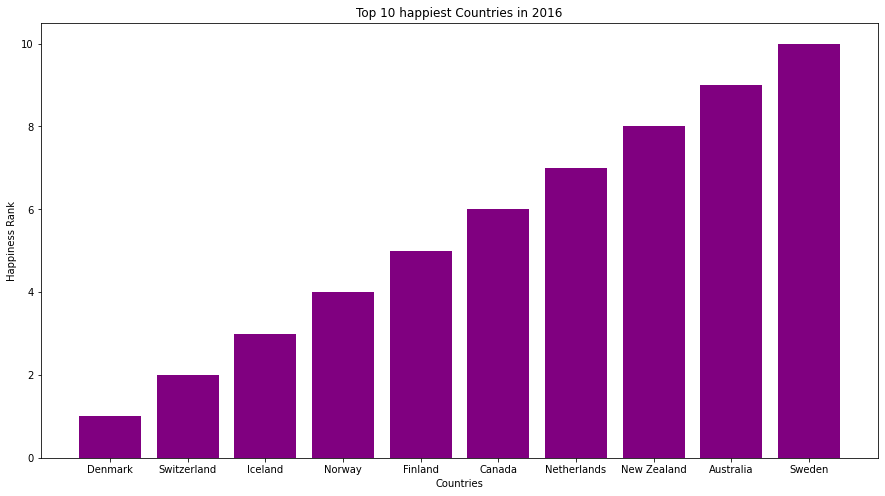

In [90]:
plt.figure(figsize=(15,8))
plt.bar(data_2016['Country'][0:10],data_2016['Happiness Rank'][0:10],color="purple")
plt.title("Top 10 happiest Countries in 2016")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

In [91]:
data_2016[['Country','Happiness Score']].head(1)

Country  Happiness Score
0  Denmark            7.526

#### Denmark ranked 1st in the year 2016 with the happiness score 7.52.

### * Bottom 10 unhappiest countries in 2016

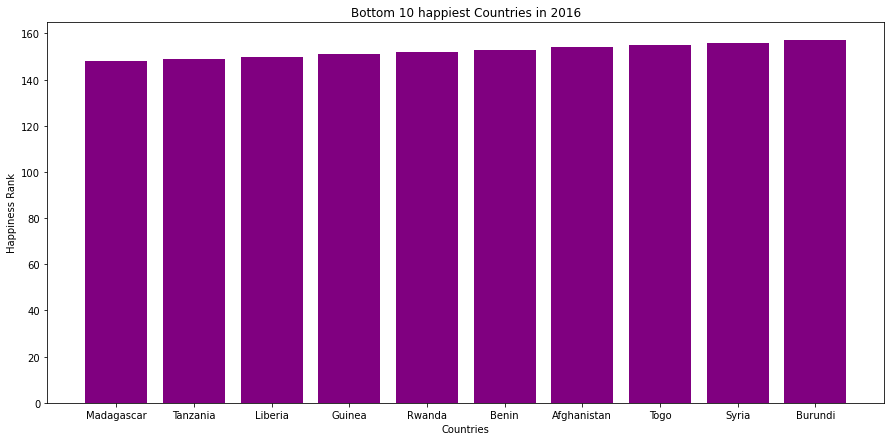

In [92]:
plt.figure(figsize=(15,7))
plt.bar(data_2016['Country'][-10:],data_2016['Happiness Rank'][-10:],color="purple")
plt.title("Bottom 10 happiest Countries in 2016")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

### * Top 10 countries by happiness score in 2016

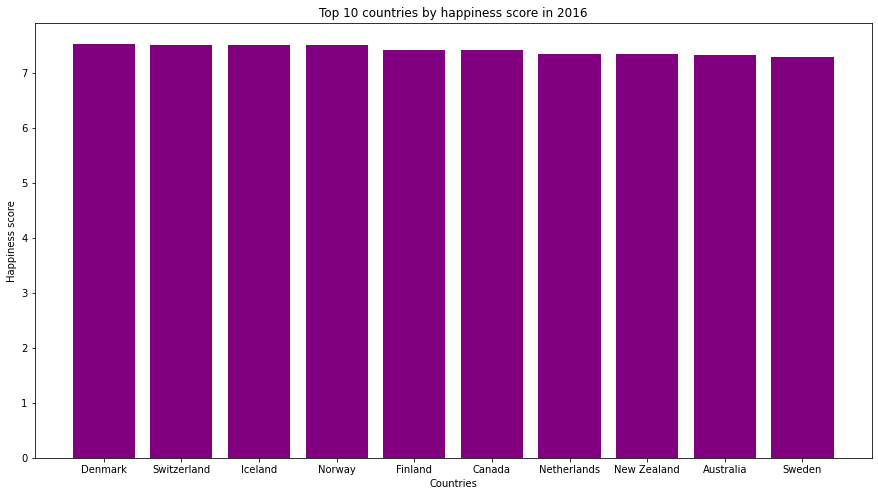

In [93]:
plt.figure(figsize=(15,8))
plt.bar(data_2016['Country'][0:10],data_2016['Happiness Score'][0:10],color="purple")
plt.title("Top 10 countries by happiness score in 2016")
plt.xlabel("Countries")
plt.ylabel("Happiness score")
plt.show()

### * India's happiness rank in 2016

In [94]:
data_2016[115:121]

Country                           Region  Happiness Rank  \
115  South Africa               Sub-Saharan Africa             116   
116     Sri Lanka                    Southern Asia             117   
117         India                    Southern Asia             118   
118       Myanmar                Southeastern Asia             119   
119         Egypt  Middle East and Northern Africa             120   
120       Armenia       Central and Eastern Europe             121   

     Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
115            4.459                      4.371                      4.547   
116            4.415                      4.322                      4.508   
117            4.404                      4.351                      4.457   
118            4.395                      4.327                      4.463   
119            4.362                      4.259                      4.465   
120            4.360                      4.266                      4.454   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
115                   1.02416  0.96053                   0.18611  0.42483   
116                   0.97318  0.84783                   0.62007  0.50817   
117                   0.74036  0.29247                   0.45091  0.40285   
118                   0.34112  0.69981                   0.39880  0.42692   
119                   0.95395  0.49813                   0.52116  0.18847   
120                   0.86086  0.62477                   0.64083  0.14037   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
115                        0.08415     0.13656            1.64227  
116                        0.07964     0.46978            0.91681  
117                        0.08722     0.25028            2.18032  
118                        0.20243     0.81971            1.50655  
119                        0.10393     0.12706            1.96895  
120                        0.03616     0.07793            1.97864

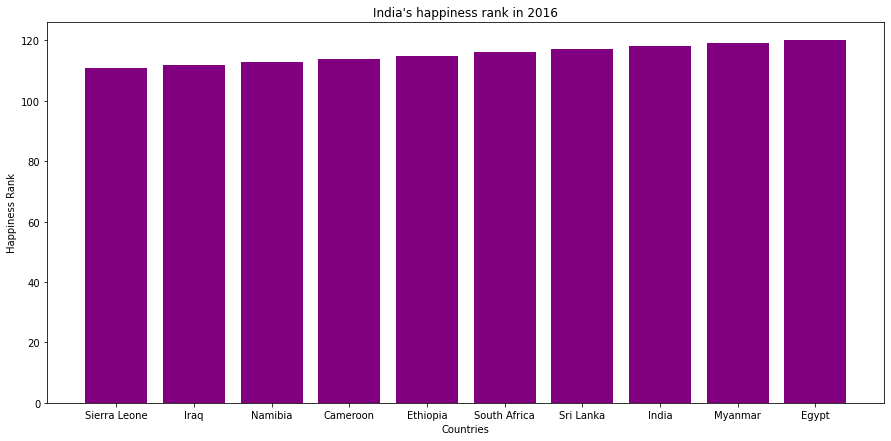

In [95]:
plt.figure(figsize=(15,7))
plt.bar(data_2016['Country'][110:120],data_2016['Happiness Rank'][110:120],color="purple")
plt.title("India's happiness rank in 2016")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

#### India ranked 118th in the year 2016 with the happiness score 4.4.

### * Top 10 countries w.r.t Economy

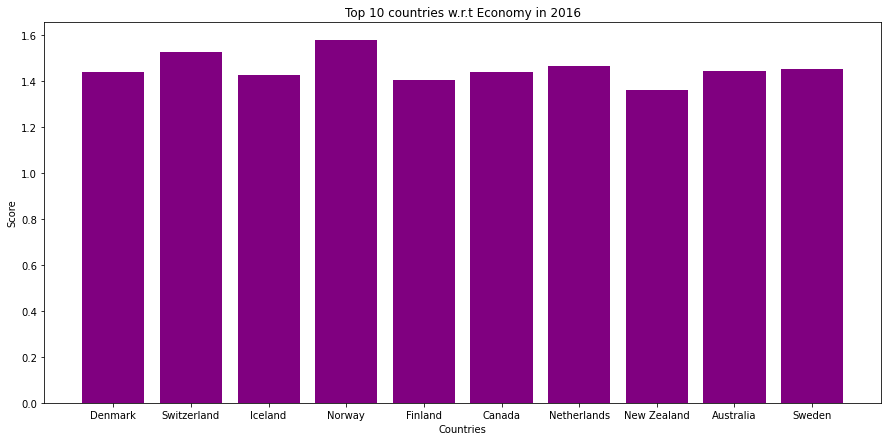

In [96]:
plt.figure(figsize=(15,7))
plt.bar(data_2016['Country'][0:10],data_2016['Economy (GDP per Capita)'][0:10],color="purple")
plt.title("Top 10 countries w.r.t Economy in 2016")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 countries w.r.t Healthy life

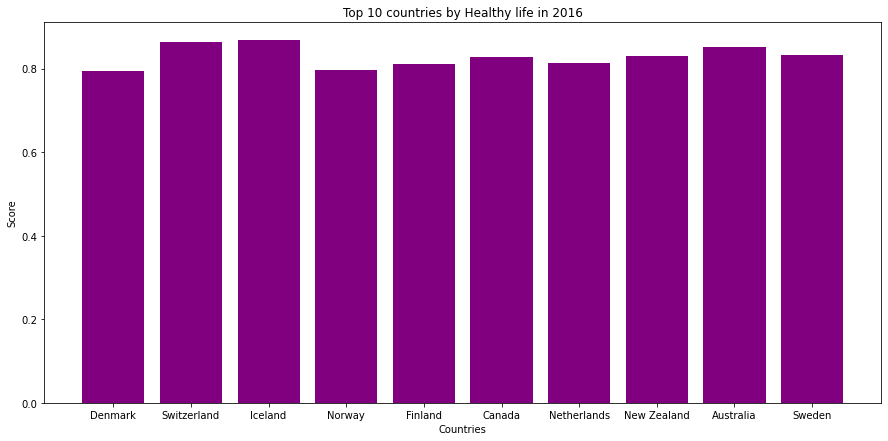

In [97]:
plt.figure(figsize=(15,7))
plt.bar(data_2016['Country'][0:10],data_2016['Health (Life Expectancy)'][0:10],color="purple")
plt.title("Top 10 countries by Healthy life in 2016")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 countries w.r.t Freedom

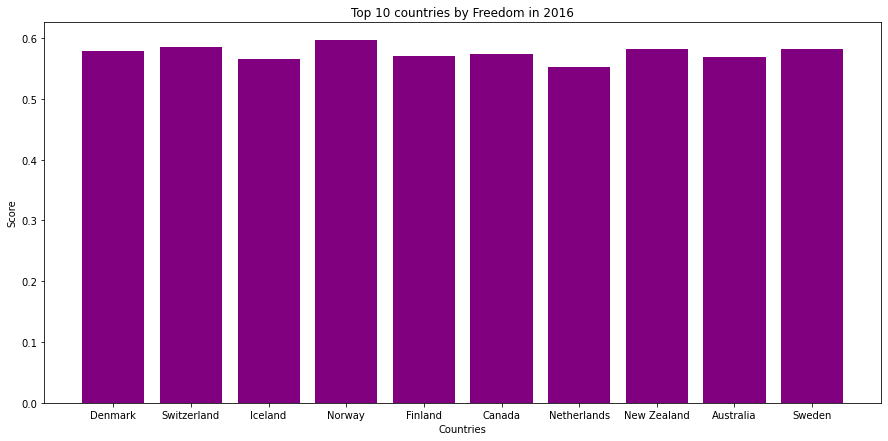

In [98]:
plt.figure(figsize=(15,7))
plt.bar(data_2016['Country'][0:10],data_2016['Freedom'][0:10],color="purple")
plt.title("Top 10 countries by Freedom in 2016")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 countries w.r.t Trust on Government

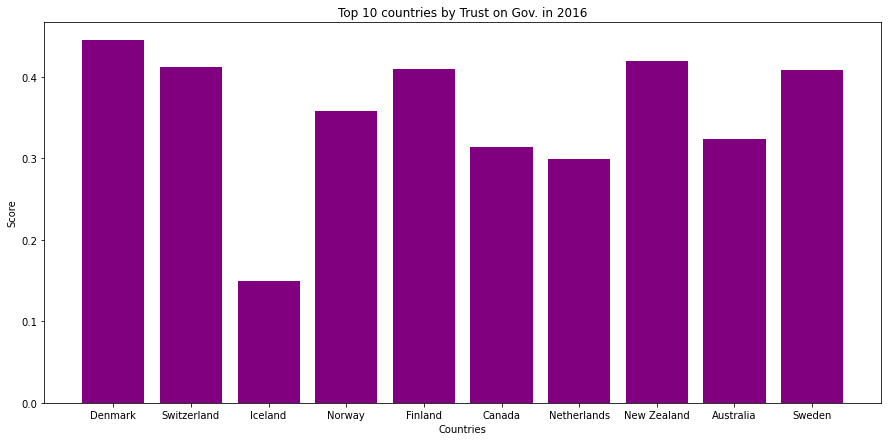

In [99]:
plt.figure(figsize=(15,7))
plt.bar(data_2016['Country'][0:10],data_2016['Trust (Government Corruption)'][0:10],color="purple")
plt.title("Top 10 countries by Trust on Gov. in 2016")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

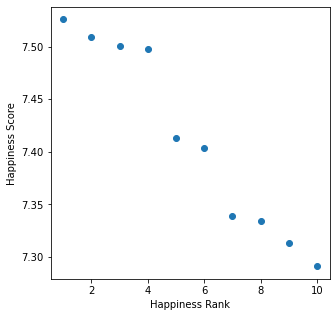

In [100]:
# Sactter Plot

plt.figure(figsize=(5,5))
plt.xlabel("Happiness Rank")
plt.ylabel("Happiness Score")
plt.scatter(data_2016['Happiness Rank'][0:10],data_2016['Happiness Score'][0:10])
plt.show()

* from the obove observation, as we can see that the most happiest countries have higher happiness score.


* Denmark ranked 1st in the year 2016 with the happiness score 7.52.


* India ranked 118th in the year 2016 with the happiness score 4.4.


* If the Denmark ranked 1st in the year 2016 with the highest happiness score, but, economically Norway is 1st with score 1.57 where Denmark is 6th with score 1.44 .


* Switzerland, Iceland, Canada and Australia are the Healthiest countries in  year 2016.


* The Freedom oriented countries are Norway, New zealand, Sweden, Switzerland.


* people has not that much trust on the government with very lowest score for each country. Iceland has very low trust on government and with very low score i.e 0.14 . Also, Netherlands and Canada also has poor trust on government. 


* But, Denmark and New Zealand has more trust on governemnt with the score 0.44 and 0.41 respectively as compared to the countries that has not that much trust.


## 2) Year - 2017

### * Top 10 Happiest Countries in 2017

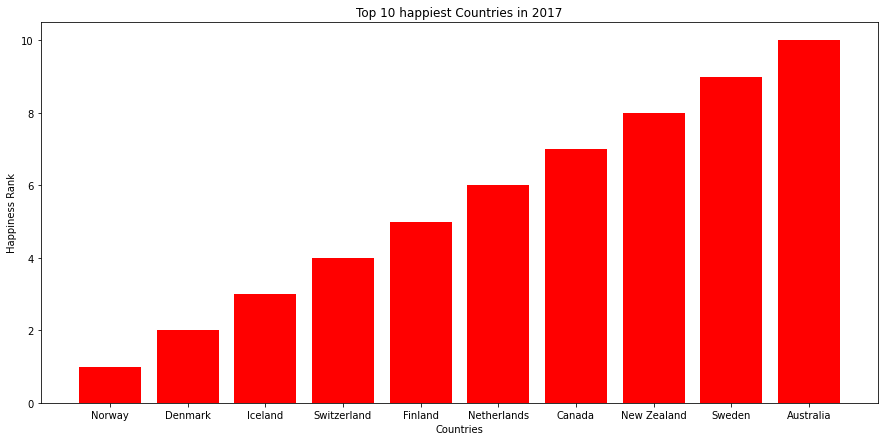

In [101]:
plt.figure(figsize=(15,7))
plt.bar(data_2017['Country'][0:10],data_2017['Happiness.Rank'][0:10],color="Red")
plt.title("Top 10 happiest Countries in 2017")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

In [102]:
data_2017[['Country','Happiness.Score']].head(1)

Country  Happiness.Score
0  Norway            7.537

#### Norway ranked 1st in the year 2017 with the happiness score 7.53.

### * Bottom 10 unhappiest countries in 2017

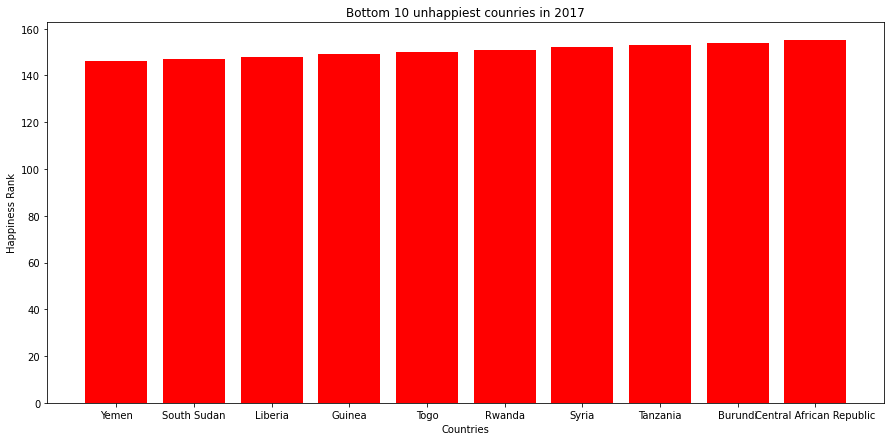

In [103]:
plt.figure(figsize=(15,7))
plt.bar(data_2017['Country'].tail(10),data_2017['Happiness.Rank'].tail(10),color="red")
plt.title("Bottom 10 unhappiest counries in 2017")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

###  * India's happiness rank in 2017

In [104]:
data_2017[120:126]

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
120              Armenia             121            4.376      4.466735   
121                India             122            4.315      4.371522   
122           Mauritania             123            4.292      4.377164   
123  Congo (Brazzaville)             124            4.291      4.410054   
124              Georgia             125            4.286      4.374934   
125     Congo (Kinshasa)             126            4.280      4.357811   

     Whisker.low  Economy..GDP.per.Capita.    Family  \
120     4.285265                  0.900597  1.007484   
121     4.258478                  0.792221  0.754373   
122     4.206836                  0.648457  1.272031   
123     4.171946                  0.808964  0.832044   
124     4.197066                  0.950613  0.570615   
125     4.202190                  0.092102  1.229023   

     Health..Life.Expectancy.   Freedom  Generosity  \
120                  0.637524  0.198303    0.083488   
121                  0.455428  0.469987    0.231538   
122                  0.285349  0.096098    0.201870   
123                  0.289957  0.435026    0.120852   
124                  0.649547  0.309410    0.054009   
125                  0.191407  0.235961    0.246456   

     Trust..Government.Corruption.  
120                       0.026674  
121                       0.092227  
122                       0.136957  
123                       0.079618  
124                       0.251667  
125                       0.060241

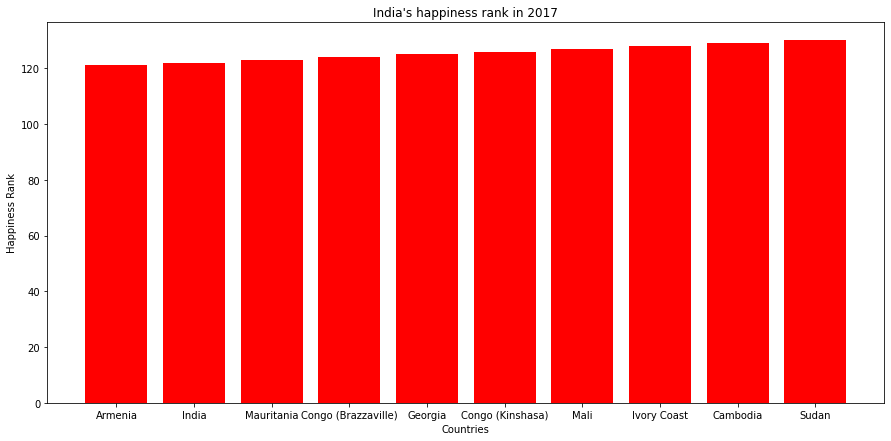

In [105]:
plt.figure(figsize=(15,7))
plt.bar(data_2017['Country'][120:130],data_2017['Happiness.Rank'][120:130],color="red")
plt.title("India's happiness rank in 2017")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

#### India ranked 122th in the year 2017 with the happiness score 4.3.¶

### * Top 10 Freedom oriented countries in 2017

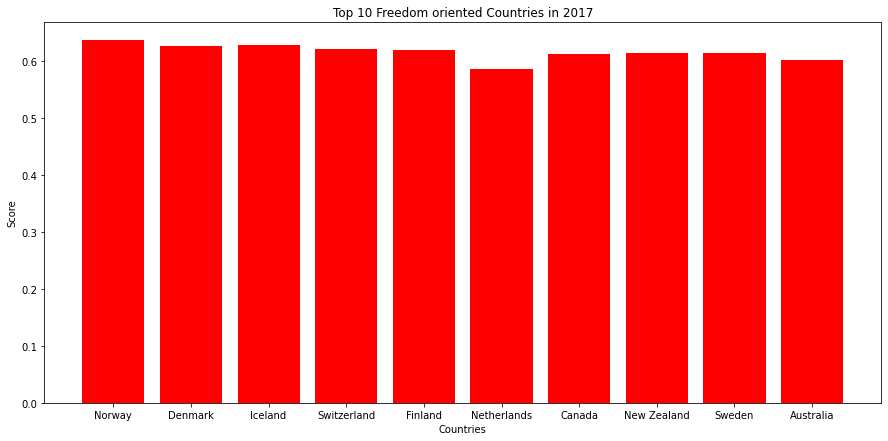

In [106]:
plt.figure(figsize=(15,7))
plt.bar(data_2017['Country'][0:10],data_2017['Freedom'][0:10],color="Red")
plt.title("Top 10 Freedom oriented Countries in 2017")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 Family supported countries in 2017

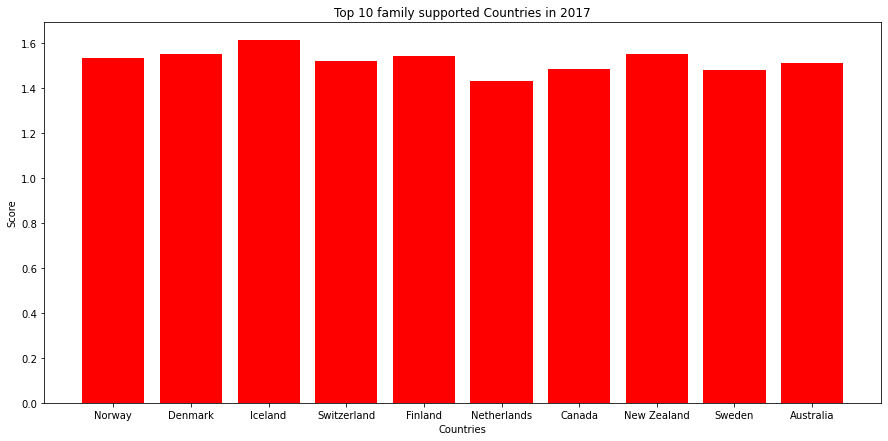

In [107]:
plt.figure(figsize=(15,7))
plt.bar(data_2017['Country'][0:10],data_2017['Family'][0:10],color="Red")
plt.title("Top 10 family supported Countries in 2017")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 countries w.r.t Healthy life in 2017

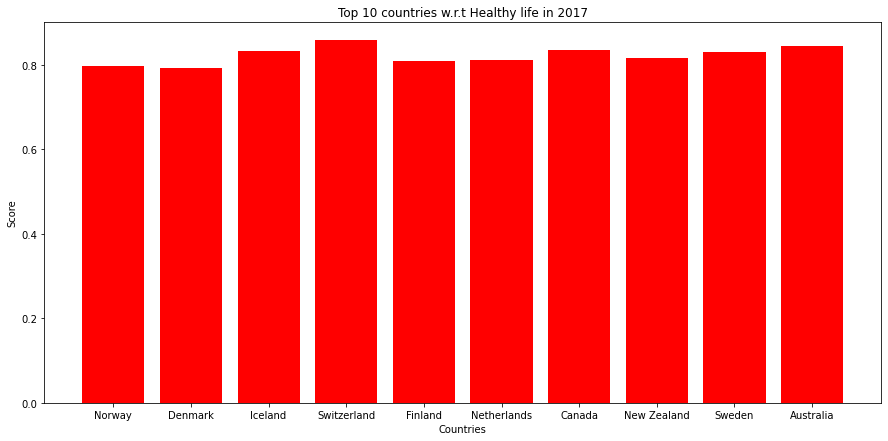

In [108]:
plt.figure(figsize=(15,7))
plt.bar(data_2017['Country'][0:10],data_2017['Health..Life.Expectancy.'][0:10],color="Red")
plt.title("Top 10 countries w.r.t Healthy life in 2017")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 Generous countries in 2017

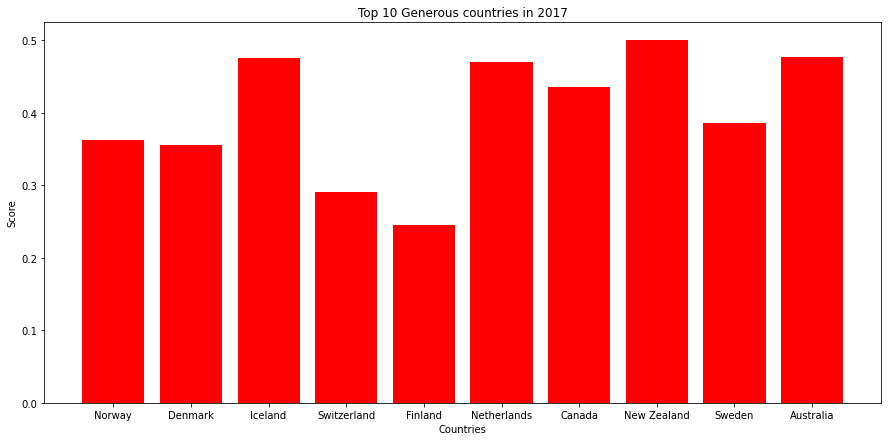

In [109]:
plt.figure(figsize=(15,7))
plt.bar(data_2017['Country'][0:10],data_2017['Generosity'][0:10],color="red")
plt.title("Top 10 Generous countries in 2017")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 countries w.r.t Trust on Gov. in 2017

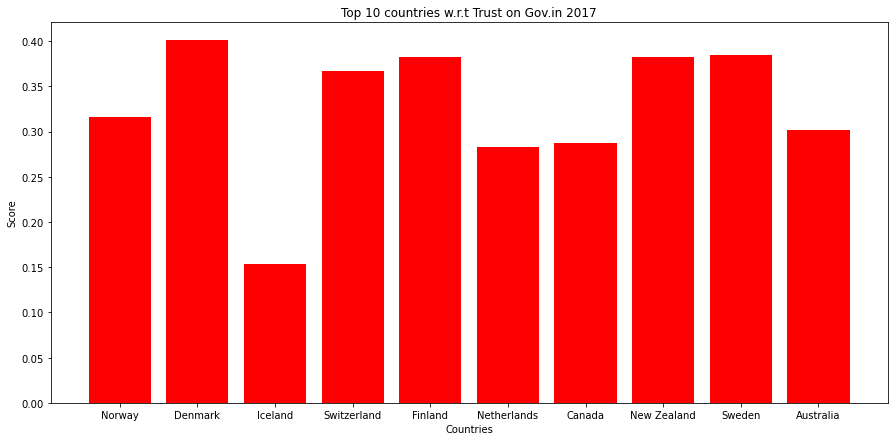

In [110]:
plt.figure(figsize=(15,7))
plt.bar(data_2017['Country'][0:10],data_2017['Trust..Government.Corruption.'][0:10],color="red")
plt.title("Top 10 countries w.r.t Trust on Gov.in 2017")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

* from the obove observation, as we can see that the most happiest countries have higher happiness score.


* Norway ranked 1st in the year 2017 with the happiness score 7.53.


* India ranked 122th in the year 2017 with the happiness score 4.3.


* There are peoples in the countries which are more family supported are Iceland, Finland, New zealand.


* Switzerland, Iceland and Australia are the Healthiest countries in year 2017.


* New zealand, Iceland, Australia and Netherlands are more Gererous where Finland and Switzerland are less.


* The Freedom oriented countries are Norway, Denmark,Iceland, Switzerland.


* people has not that much trust on the government with very lowest score for each country. Iceland has very low trust on government and with very low score i.e 0.15 . Also, Netherlands and Canada also has poor trust on government.


* But,Denmark, Finland and New Zealand has more trust on governemnt with the score 0.4, 0.3826 and 0.3828 respectively as compared to the countries that has not that much trust.

## 3) Year - 2018

### * Top 10 happiest countries in 2018

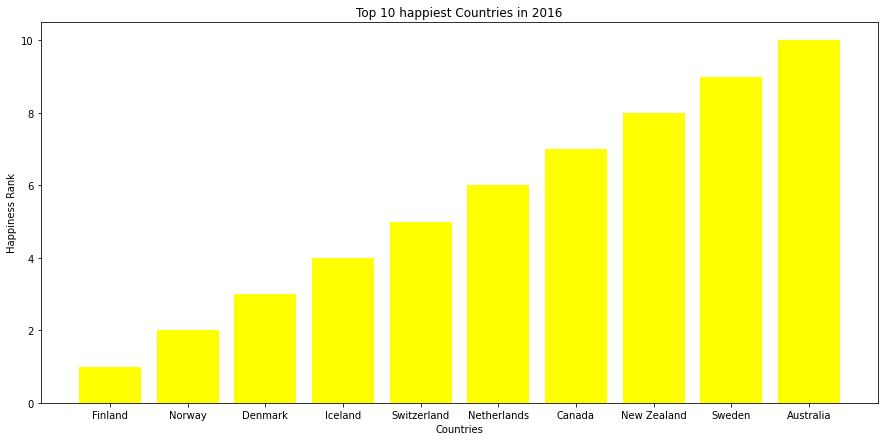

In [111]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][0:10],data_2018['Overall rank'][0:10],color="Yellow")
plt.title("Top 10 happiest Countries in 2016")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

### * Top 10 countries by happiness score in 2018

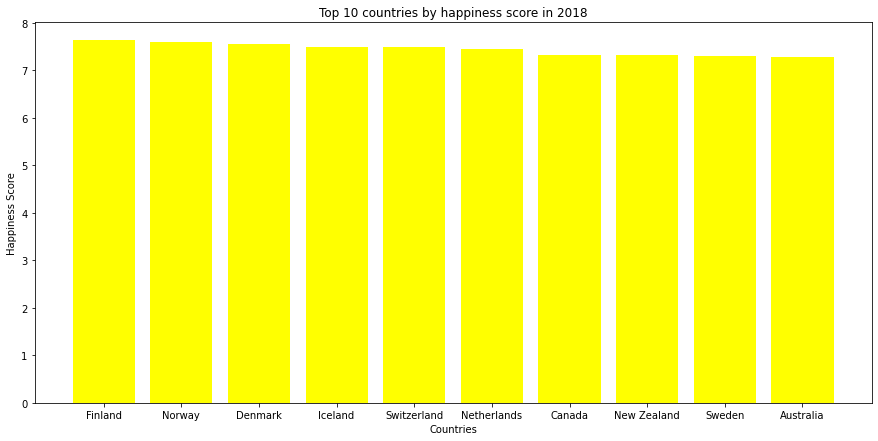

In [112]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][0:10],data_2018['Score'][0:10],color="yellow")
plt.title("Top 10 countries by happiness score in 2018")
plt.xlabel("Countries")
plt.ylabel("Happiness Score")
plt.show()

In [113]:
data_2018[['Country or region','Score']].head(1)

Country or region  Score
0           Finland  7.632

#### Finland ranked 1st in the year 2018 with the happiness score is 7.6.

### * Bottom 10 unhappiest countries in 2018

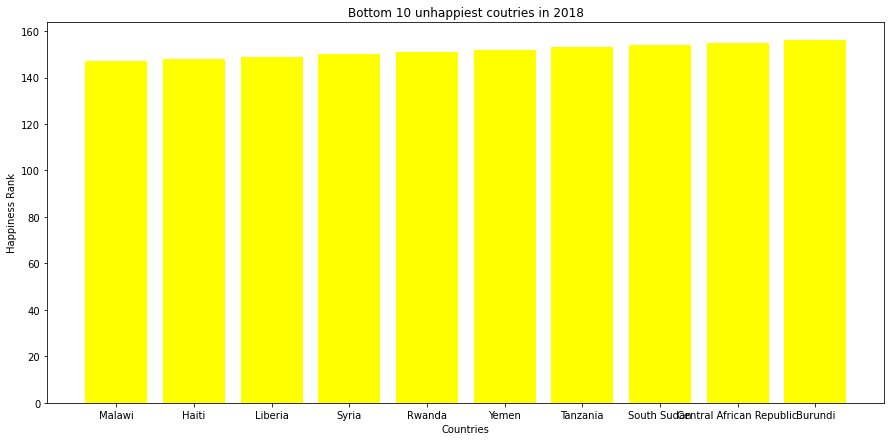

In [114]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][-10:],data_2018['Overall rank'][-10:],color="Yellow")
plt.title("Bottom 10 unhappiest coutries in 2018")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

### * India's happiness rank in 2018

In [115]:
data_2018[130:136]

Country or region  Overall rank  Score  GDP per capita  Social support  \
130              Chad           131  4.301           0.358           0.907   
131  Congo (Kinshasa)           132  4.245           0.069           1.136   
132             India           133  4.190           0.721           0.747   
133             Niger           134  4.166           0.131           0.867   
134            Uganda           135  4.161           0.322           1.090   
135             Benin           136  4.141           0.378           0.372   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
130                    0.053                         0.189       0.181   
131                    0.204                         0.312       0.197   
132                    0.485                         0.539       0.172   
133                    0.221                         0.390       0.175   
134                    0.237                         0.450       0.259   
135                    0.240                         0.440       0.163   

     Perceptions of corruption  
130                      0.060  
131                      0.052  
132                      0.093  
133                      0.099  
134                      0.061  
135                      0.067

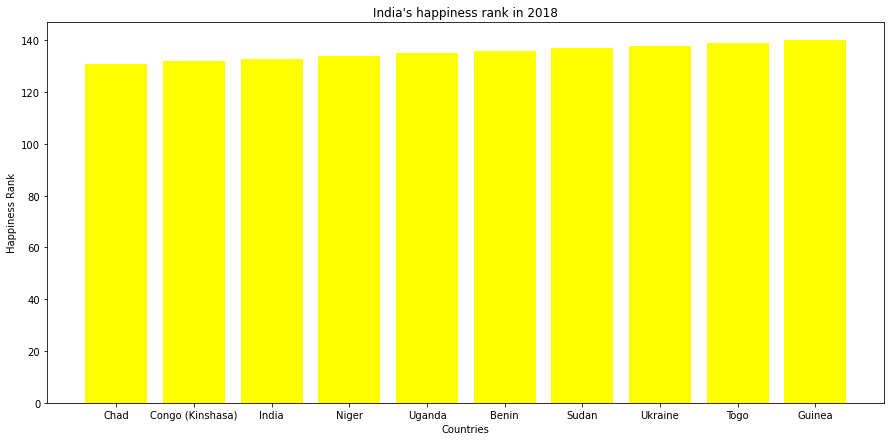

In [116]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][130:140],data_2018['Overall rank'][130:140],color="yellow")
plt.title("India's happiness rank in 2018")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

#### India ranked 133th in the year 2018 with the happiness score 4.1.

### * Top 10 happy countries w.r.t social support

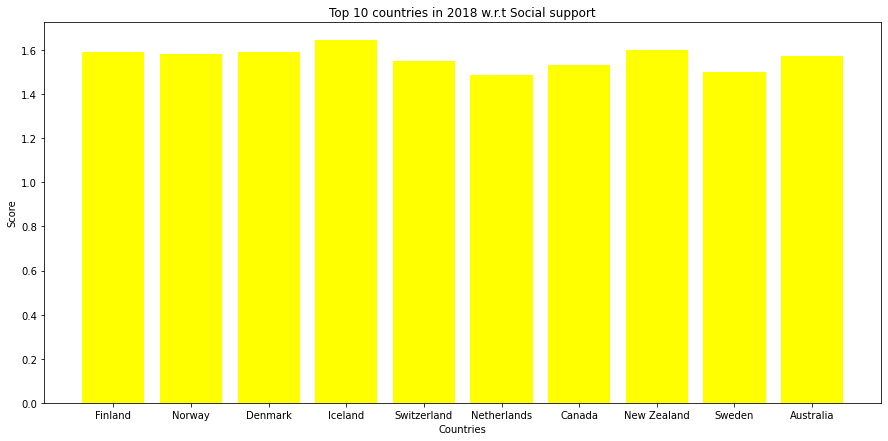

In [117]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][0:10],data_2018['Social support'][0:10],color="yellow")
plt.title("Top 10 countries in 2018 w.r.t Social support")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 happiest coutries w.r.t Healthy life in 2018

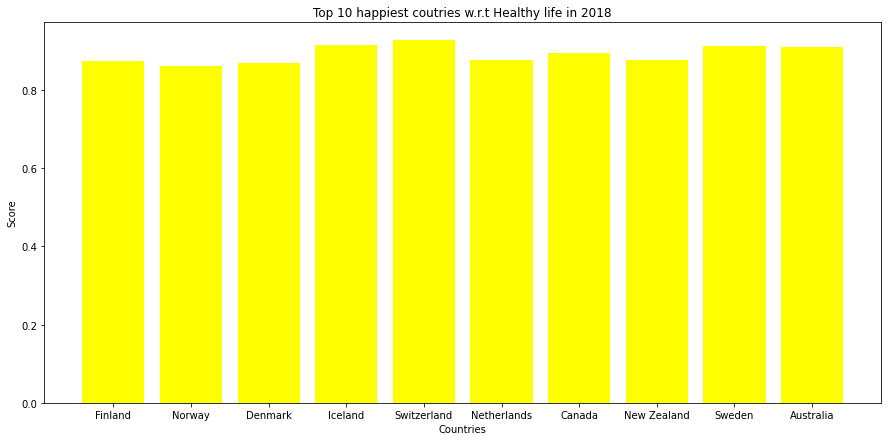

In [118]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][0:10],data_2018['Healthy life expectancy'][0:10],color="Yellow")
plt.title("Top 10 happiest coutries w.r.t Healthy life in 2018")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 Freedom oriented countries in 2018

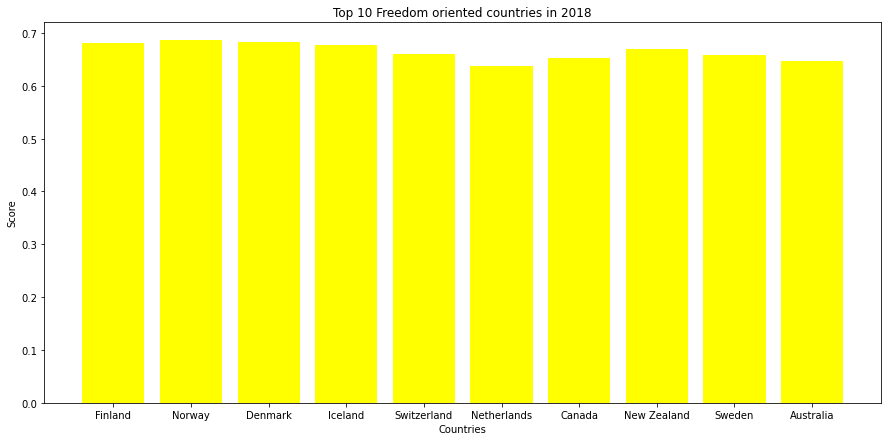

In [119]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][0:10],data_2018['Freedom to make life choices'][0:10],color="yellow")
plt.title("Top 10 Freedom oriented countries in 2018")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 Generous countries in 2018

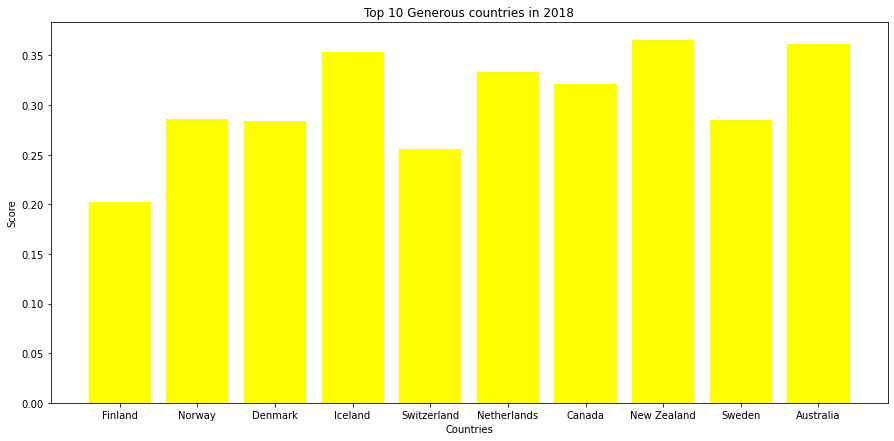

In [120]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][0:10],data_2018['Generosity'][0:10],color="Yellow")
plt.title("Top 10 Generous countries in 2018")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 countries w.r.t Perception on corruption in 2018

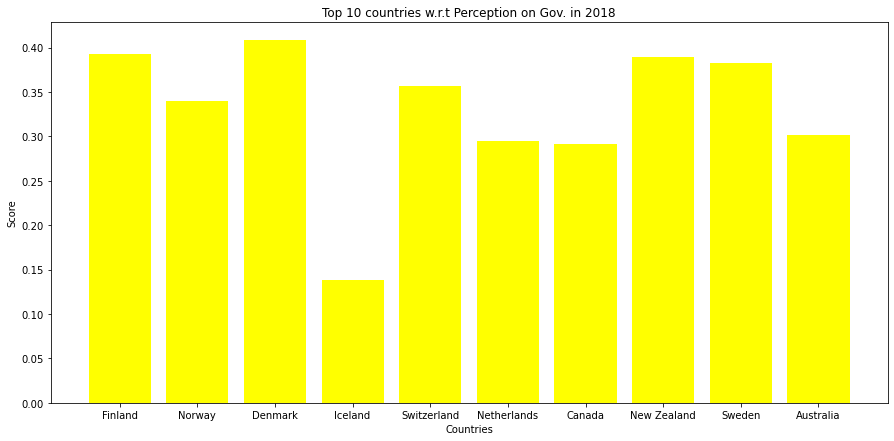

In [121]:
plt.figure(figsize=(15,7))
plt.bar(data_2018['Country or region'][0:10],data_2018['Perceptions of corruption'][0:10],color="Yellow")
plt.title("Top 10 countries w.r.t Perception on Gov. in 2018")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

* from the above observation, as we can see that the most happiest countries have higher happiness score.


* Finland ranked 1st in the year 2018 with the happiness score is 7.6.


* India ranked 133th in the year 2018 with the happiness score 4.1.


* There are peoples in the countries which are more socially supported are Iceland with score 1.6 where Finland, Norway, Denmark also with good score.


* Switzerland, Iceland and Australia are the Healthiest countries in year 2018.


* New zealand, Iceland, Australia and Netherlands are more Generous where Finland and Switzerland are less.


* The Freedom oriented countries are Norway, Denmark, Finland, Iceland, Switzerland where other countries has also almost similar score .


* people has not that much trust on the government and corruption with very lowest score for each country. Iceland has very low trust on government and with very low score i.e 0.13 . Also, Netherlands and Canada also has poor trust on government.


* But,Denmark, Finland and New Zealand has more trust on governemnt with the score 0.4, 0.393 and 0.388 respectively as compared to the countries that has not that much trust.

## 4) Year - 2019 

### * Top 10 happiest countries in 2019

In [122]:
df = data_2019[:10].sort_values('Overall rank', ascending = True)
px.bar(df, x='Overall rank', y='Country or region',orientation='h',title="Top 10 happiest countries in 2019")

In [123]:
data_2019[['Country or region','Score']].head(1)

Country or region  Score
0           Finland  7.769

#### Finland ranked 1st in the year 2019 with the happiness score is 7.76.

### * Bottom 10 unhappiest countries in 2019

In [124]:
df = data_2019[-10:].sort_values('Overall rank', ascending = True)
px.bar(df, x='Overall rank', y='Country or region',orientation='v',title="Botton 10 unhappiest countries in 2019")

### * Top 10 happiest countries with happiness score in 2019

In [125]:
df = data_2019[0:10].sort_values('Score', ascending = False)
px.bar(df, x='Country or region', y='Score',orientation='v',title="Top 10 happiest countries with happiness score in 2019")

### * India's happiness rank in 2019

In [126]:
data_2019[135:141]

Country or region  Overall rank  Score  GDP per capita  Social support  \
135            Uganda           136  4.189           0.332           1.069   
136             Egypt           137  4.166           0.913           1.039   
137            Zambia           138  4.107           0.578           1.058   
138              Togo           139  4.085           0.275           0.572   
139             India           140  4.015           0.755           0.765   
140           Liberia           141  3.975           0.073           0.922   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
135                    0.443                         0.356       0.252   
136                    0.644                         0.241       0.076   
137                    0.426                         0.431       0.247   
138                    0.410                         0.293       0.177   
139                    0.588                         0.498       0.200   
140                    0.443                         0.370       0.233   

     Perceptions of corruption  
135                      0.060  
136                      0.067  
137                      0.087  
138                      0.085  
139                      0.085  
140                      0.033

In [127]:
df = data_2019[135:145].sort_values('Overall rank', ascending = True)
px.bar(df, x='Overall rank', y='Country or region',orientation='v',title="India's happiness rank in 2019")

#### India ranked 140th in the year 2019 with the happiness score 4.0.

### * Top 10 Socially supported in 2019

In [128]:
df = data_2019[0:10].sort_values('Social support', ascending = False)
px.bar(df, x='Country or region', y='Social support',orientation='v',title="Top 10 Social supported in 2019")

### * Top 10 Healthiest countries in 2019

In [129]:
df = data_2019[0:10].sort_values('Healthy life expectancy', ascending = True)
px.bar(df, x='Country or region', y='Healthy life expectancy',orientation='v',title="Top 10 Healthiest countries in 2019")

### * Top 10 Freedom oriented in 2019

In [130]:
df = data_2019[0:10].sort_values('Freedom to make life choices', ascending = True)
px.bar(df, x='Country or region', y='Freedom to make life choices',orientation='v',title="Top 10 Freedom oriented in 2019")

### * Top 10 Generous in 2019

In [131]:
df = data_2019[0:10].sort_values('Generosity', ascending = True)
px.bar(df, x='Country or region', y='Generosity',orientation='v',title="Top 10 Generous in 2019")

### * Perception on corruption of top 10 countries in 2019

In [132]:
df = data_2019[0:10].sort_values('Perceptions of corruption', ascending = True)
px.bar(df, x='Perceptions of corruption', y='Country or region',orientation='h',title="Perception on corruption of top 10 countries in 2019")

* There are peoples in the countries which are more socially supported are Iceland with score 1.6 where Finland, Norway, Denmark also with score 1.5.


* As we can see that the most happiest countries have higher happiness score.


* Finland ranked 1st in the year 2019 with the happiness score is 7.76.


* India ranked 140th in the year 2019 with the happiness score 4.0.


* Switzerland and Canada are the Healthiest countries in year 2019 with score 1.05 and 1.03 respectively where Norway, New Zealand, Iceland with score 1.02.


* Iceland (0.3), New zealand and Netherlands are more Generous where Finland is less.


* The Freedom oriented countries are Norway, Denmark, Finland, Iceland, Switzerland where other countries has also almost similar score .


* people has not that much trust on the government and perception on corruption with very lowest score for each country. Iceland has very low trust on government and with very low score i.e 0.13 . Also, Netherlands and Canada also has poor trust on government.


* But,Denmark, Finland and New Zealand has more trust on governemnt with the score 0.4, 0.393 and 0.388 respectively as compared to the countries that has not that much trust.

### * Countries for each attribute in 2019

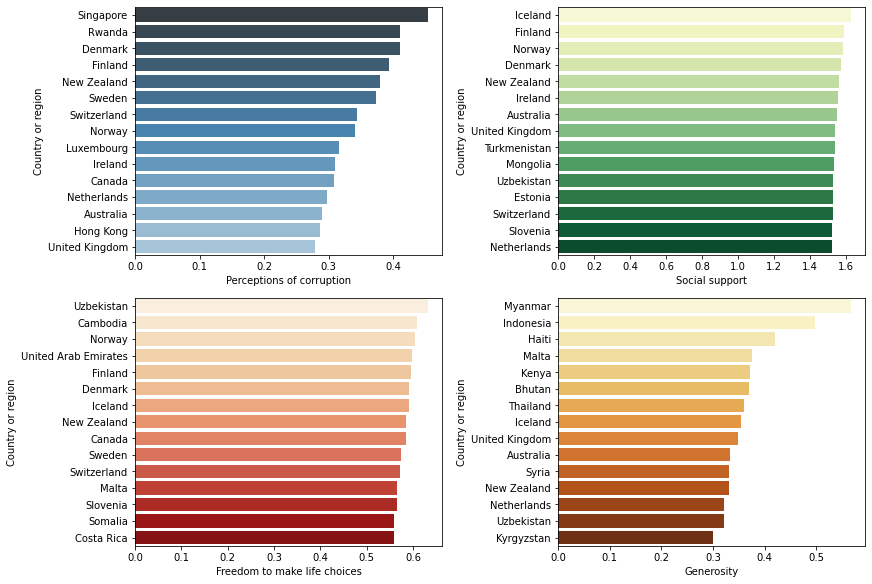

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x= 'Perceptions of corruption',y='Country or region',data=data_2019.nlargest(15,'Perceptions of corruption'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=data_2019.nlargest(15,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=data_2019.nlargest(15,'Freedom to make life choices'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Generosity' ,y='Country or region',data=data_2019.nlargest(15,'Generosity'),ax=axes[1,1],palette='YlOrBr')

## 5) Year - 2020

### * Top 10 happiest countries in 2020

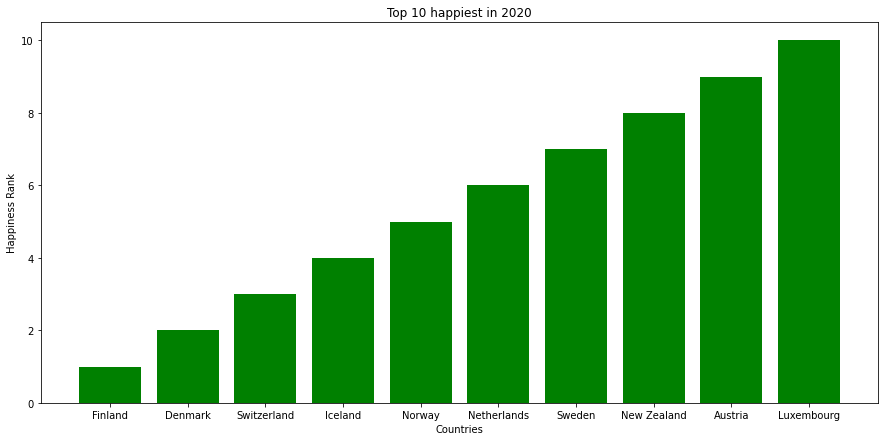

In [134]:
plt.figure(figsize=(15,7))
plt.bar(data_2020['Country name'][0:10],data_2020['Rank'][0:10],color="green")
plt.title("Top 10 happiest in 2020")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

In [135]:
data_2020[['Country name','Ladder score']].head(1)

Country name  Ladder score
0      Finland        7.8087

#### Finland ranked 1st in the year 2020 with the happiness score 7.808.

#### As we can see here is that, Finland ranked 1st in the past 3 Years i.e 2018,2019,2020 with the Highest Happiness Score of 7.5

### * Top 10 happiest countries with happiness score in 2020

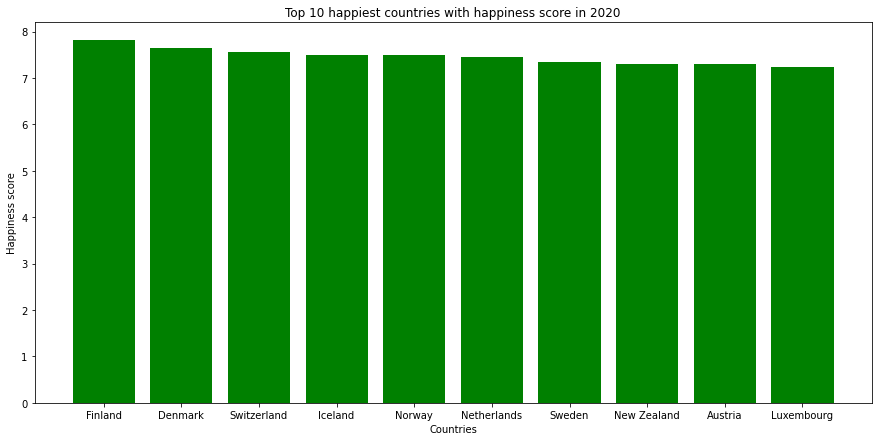

In [136]:
plt.figure(figsize=(15,7))
plt.bar(data_2020['Country name'][0:10],data_2020['Ladder score'][0:10],color="green")
plt.title("Top 10 happiest countries with happiness score in 2020")
plt.xlabel("Countries")
plt.ylabel("Happiness score")
plt.show()

### * Scatter Plot for Happiness rank Vs Happiness score

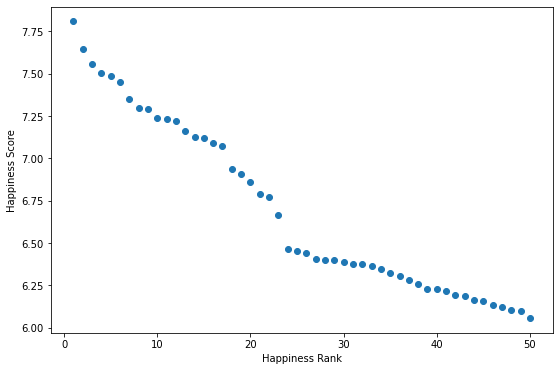

In [137]:
plt.figure(figsize=(9,6))
plt.xlabel("Happiness Rank")
plt.ylabel("Happiness Score")
plt.scatter(x=data_2020['Rank'][0:50],y=data_2020['Ladder score'][0:50])
plt.show()

### * Botton 10 unhappiest countries in 2020

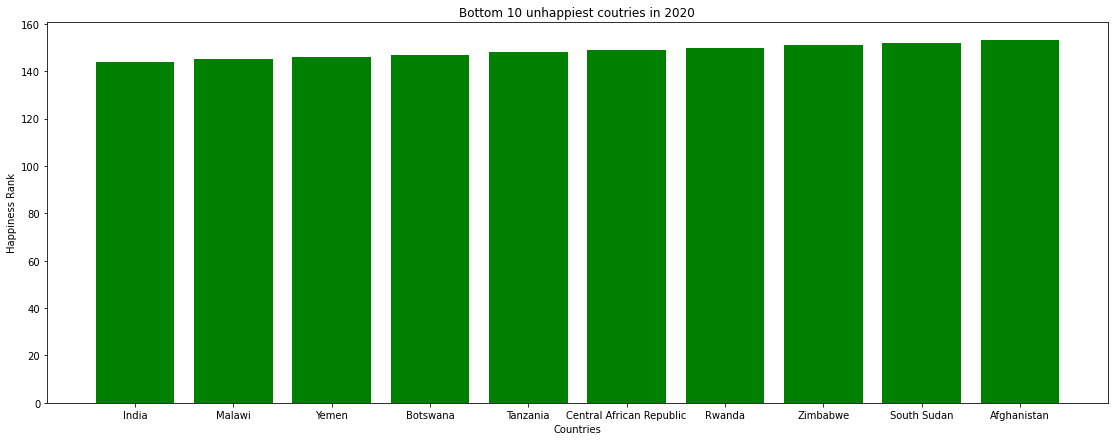

In [138]:
plt.figure(figsize=(19,7))
plt.bar(data_2020['Country name'][-10:],data_2020['Rank'][-10:],color="green")
plt.title("Bottom 10 unhappiest coutries in 2020")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

### * India's happiness rank in 2020

In [139]:
data_2020[140:146]

Country name  Rank            Regional indicator  Ladder score  \
140       Zambia   141            Sub-Saharan Africa        3.7594   
141        Haiti   142   Latin America and Caribbean        3.7208   
142      Lesotho   143            Sub-Saharan Africa        3.6528   
143        India   144                    South Asia        3.5733   
144       Malawi   145            Sub-Saharan Africa        3.5380   
145        Yemen   146  Middle East and North Africa        3.5274   

     Logged GDP per capita  Social support  Healthy life expectancy  \
140               8.224720        0.698824                55.299377   
141               7.411329        0.593248                55.598625   
142               7.960488        0.780496                48.003624   
143               8.849824        0.592201                60.215187   
144               7.062226        0.544007                57.592888   
145               7.759683        0.817981                56.727283   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
140                      0.806500    0.078037                   0.801290   
141                      0.537825    0.400535                   0.684767   
142                      0.738126   -0.145732                   0.857392   
143                      0.881445    0.057552                   0.772043   
144                      0.803223    0.021433                   0.731701   
145                      0.599920   -0.157735                   0.800288   

     Ladder score in Dystopia  Dystopia + residual  
140                  1.972317             1.134339  
141                  1.972317             1.619917  
142                  1.972317             1.445514  
143                  1.972317             0.734131  
144                  1.972317             1.552718  
145                  1.972317             1.116473

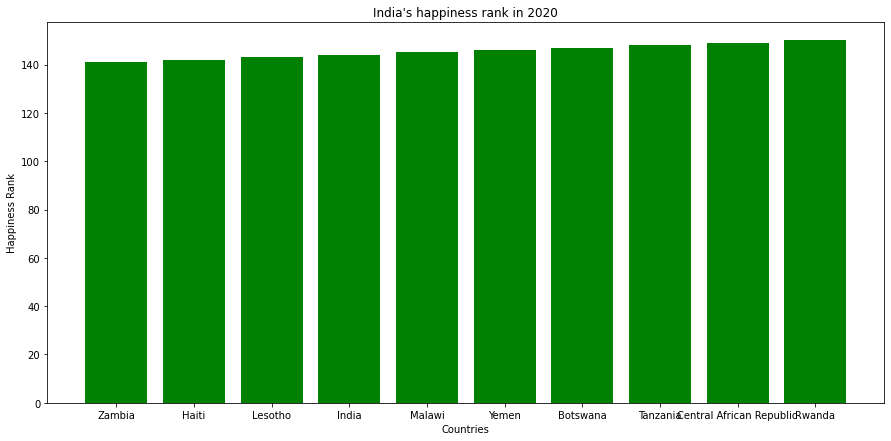

In [140]:
plt.figure(figsize=(15,7))
plt.bar(data_2020['Country name'][140:150],data_2020['Rank'][140:150],color="green")
plt.title("India's happiness rank in 2020")
plt.xlabel("Countries")
plt.ylabel("Happiness Rank")
plt.show()

#### India ranked 144th in the year 2020 with the happiness score 3.5.

### * Top 10 Freedom oriented countries in 2020 

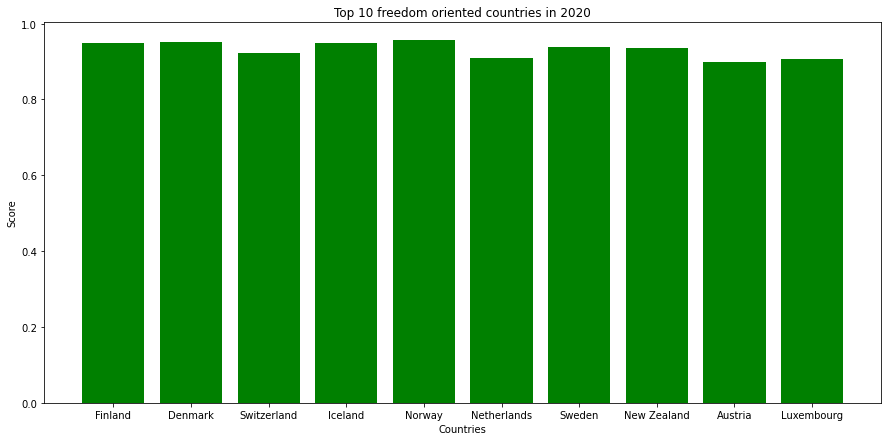

In [141]:
plt.figure(figsize=(15,7))
plt.bar(data_2020['Country name'][0:10],data_2020['Freedom to make life choices'][0:10],color="green")
plt.title("Top 10 freedom oriented countries in 2020")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 Healthiest countries in 2020

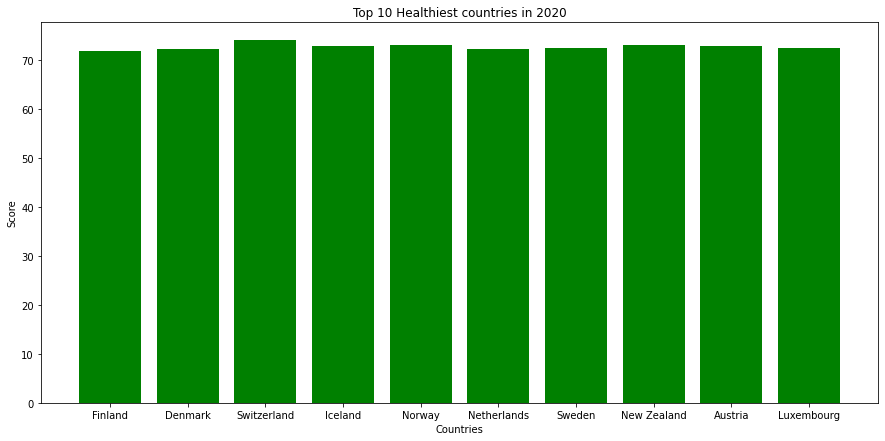

In [142]:
plt.figure(figsize=(15,7))
plt.bar(data_2020['Country name'][0:10],data_2020['Healthy life expectancy'][0:10],color="green")
plt.title("Top 10 Healthiest countries in 2020")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 Social supported in 2020

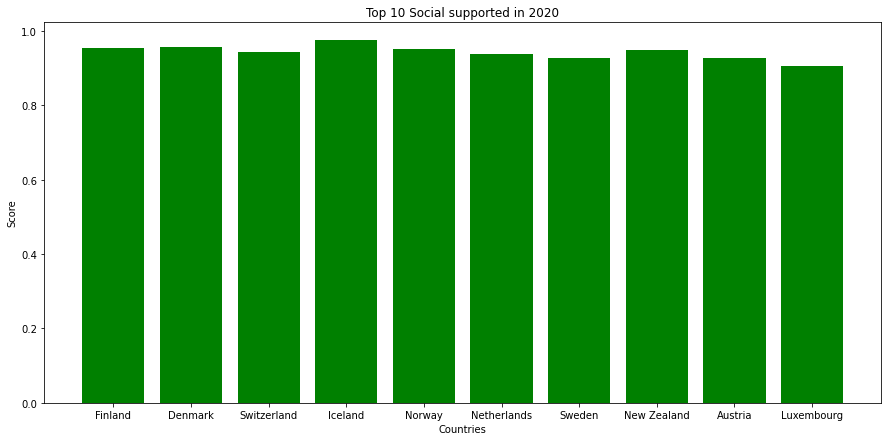

In [143]:
plt.figure(figsize=(15,7))
plt.bar(data_2020['Country name'][0:10],data_2020['Social support'][0:10],color="green")
plt.title("Top 10 Social supported in 2020")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Top 10 Generous in 2020

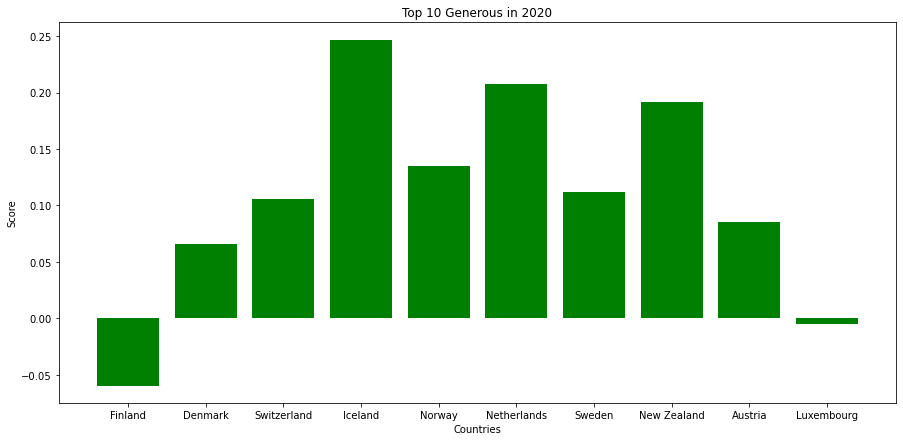

In [144]:
plt.figure(figsize=(15,7))
plt.bar(data_2020['Country name'][0:10],data_2020['Generosity'][0:10],color="green")
plt.title("Top 10 Generous in 2020")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Perception on corruption of top 10 countries in 2020

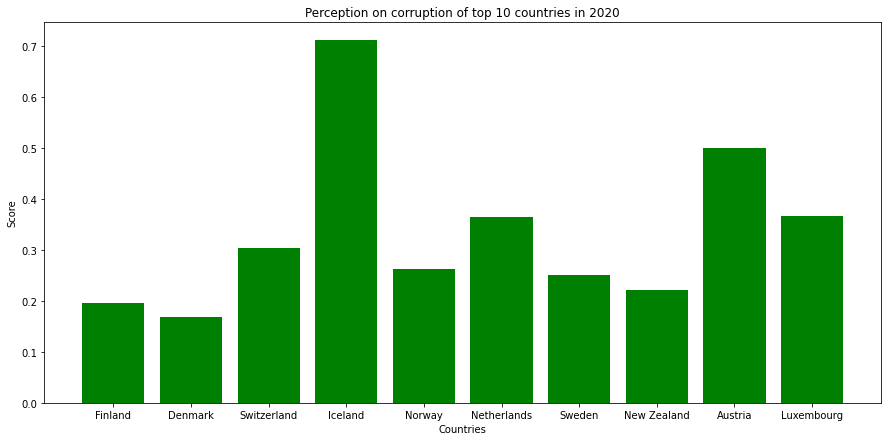

In [145]:
plt.figure(figsize=(15,7))
plt.bar(data_2020['Country name'][0:10],data_2020['Perceptions of corruption'][0:10],color="green")
plt.title("Perception on corruption of top 10 countries in 2020")
plt.xlabel("Countries")
plt.ylabel("Score")
plt.show()

### * Which Region Has Highest Happiest Countries in year 2020 ?

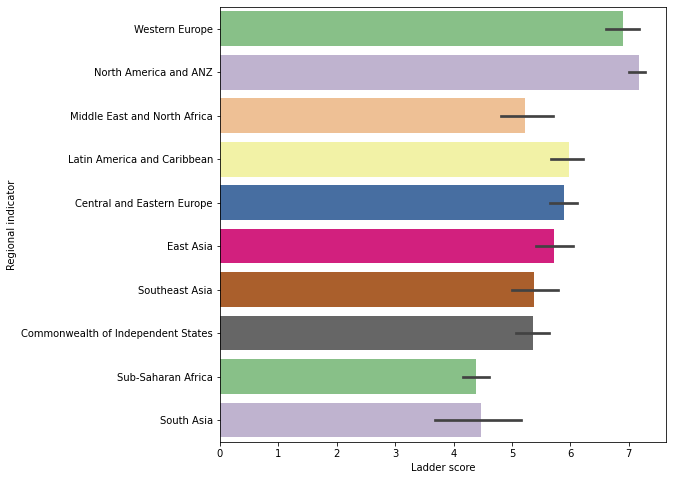

In [146]:
# most happiest regions

plt.figure(figsize=(8,8))
sns.barplot(x="Ladder score", y="Regional indicator", data=data_2020, palette='Accent')

* There are peoples in the countries which are more socially supported are Iceland with score 0.97 where Finland, Norway, Denmark also with score 0.95.


* As we can see that the most happiest countries have higher happiness score. 


* Finland ranked 1st in the year 2020 with the happiness score 7.808.


* India ranked 144th in the year 2020 with the happiness score 3.5.


* The happiest regions are Western Europe, North America and unhappiest region is Sub-Saharan Africa.


* Switzerland is the Healthiest countries in year 2020 with score 74.1 where Norway, New Zealand, Iceland with score 73.2.


* Iceland is more Generous with score 0.24 where Finland and Denmark are less with score -0.05 and 0.06.


* The Freedom oriented countries are Norway, Denmark with score 0.95 where Finland, Iceland has score 0.94 where other countries has also almost similar score .


* people has not that much trust on the government and perception on corruption with very lowest score for each country. Iceland has more trust on government and with very high score i.e 0.71 .


* But,Denmark, Finland has less trust on governemnt with the score 0.16 and respectively where Sweden and New Zealand also has poor trust on Gov.

### * Countries for each attribute in 2020

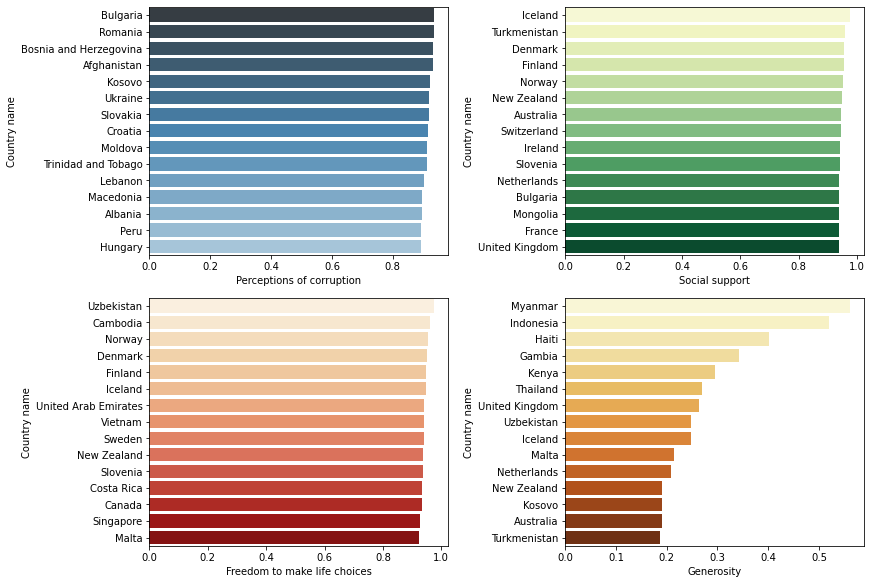

In [147]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x= 'Perceptions of corruption',y='Country name',data=data_2020.nlargest(15,'Perceptions of corruption'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country name',data=data_2020.nlargest(15,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Freedom to make life choices' ,y='Country name',data=data_2020.nlargest(15,'Freedom to make life choices'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Generosity' ,y='Country name',data=data_2020.nlargest(15,'Generosity'),ax=axes[1,1],palette='YlOrBr')

#### Here, we can see that North America and ANZ Region have highest Happiness Score While Sub-Saharan Africa with the Least.

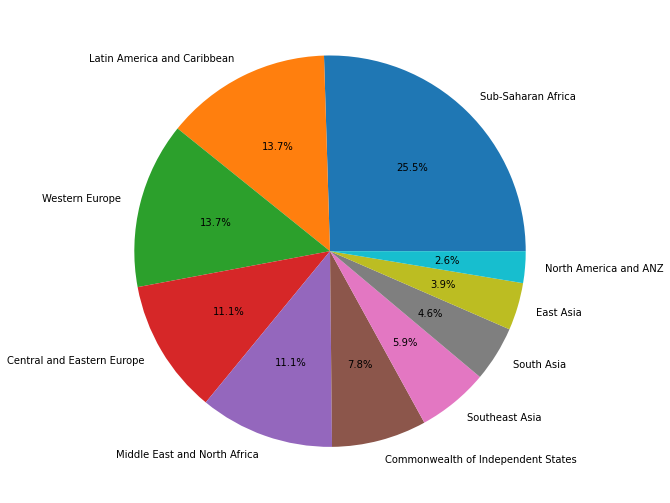

In [148]:
plt.figure(figsize=(9,9))
plt.pie(list(data_2020['Regional indicator'].value_counts()),labels=list(data_2020['Regional indicator'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

## Below Conclusions are drawn based on the observations we got from the data:

1. Happiest Countries have Higher GDP Per Capita, Social Support from Family, More Life Expectancy and people have more Freedom to make Life choices compared to Unhappiest Countries.


2. Denmark ranked 1st for the year 2016.


3. Norway ranked 1st for the year 2017.


4. Finland ranked 1st for the past 3 Years i.e 2018,2019,2020 with the Highest Happiness Score of 7.5


5. Switzerland, Iceland, Canada and Australia are Healthiest countries in the year 2016, 2017, 2018 where with these countries Norway and New Zealand are also come forward.


6. For every from 2016 to 2020 year Iceland, Finland, Norway, Denmark are more Socially supported countries than other.


7. For each year from 2016 to 2020 year, there are countries like Norway, Denmark, Finland, Norway, switzerland are freedom oriented countries. 


8. Generosity doesn’t impact the Happiness Score of a country. Least Happy Countries are more generous. For evry year Iceland, New Zealand, Netherland are more Generous countries where Finland, Switzerland are less.


9. The happiest regions are Western Europe, North America, unhappiest region is Sub-Saharan Africa.


10. Trust to the government effects the level of happiness. For year from 2016 to 2019, Iceland has very less trust on government and perception on corruption with other countries like Netherland and Canada where Denmark and New Zealand has more trust.


11. But in 2020, Iceland has more trust on government and perception on corruption where Denmark, Finland and New Zealand has less  as compared to previous years.


## Other information about report:

* India ranked 118th in the year 2016 with the happiness score 4.4.


* India ranked 122th in the year 2017 with the happiness score 4.3.


* India ranked 133th in the year 2018 with the happiness score 4.1.


* India ranked 140th in the year 2019 with the happiness score 4.0.


* India ranked at 144 out of 156 countries in the year 2020 report with the happiness score 3.5 .


* As we can see here that India ranked low for every year that there is no any growth because of the factor affecting like Health, Trust on Governemnt, Generosity, Freedom , Poverty, Education.


* Neighbouring countries performance: Pakistan ranked 105th, China ranked 84th, SriLanka ranked 129th and Bangladesh ranked 101th.


* Other nations that ranked below India are Burundi, Yemen, Tanzania, Haiti, Malawi, Botswana, Zimbabwe.


* The United States ranks at 19th place for happiness despite being one of the richest countries in the world.


* Afghanistan is one of the bottom of the list afflicated by violent conflicts and extreme poverty, followed by Zimbabwe(148).

## Prediction using Regression

In [149]:
# Independant variable

x = data_2019.iloc[:,1:-7]
x

Overall rank
0               1
1               2
2               3
3               4
4               5
..            ...
151           152
152           153
153           154
154           155
155           156

[156 rows x 1 columns]

In [150]:
# Dependant variable

y = data_2019['Score']
y

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64

In [151]:
# Splitting the dataset into training set and test set

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [152]:
print("Training data of independent variable(x):",xtrain.shape)
print("Testing data of independent variable(x):",xtest.shape)
print("Training data of dependent variable(y):",ytrain.shape)
print("Testing data of dependent variable(y):",ytest.shape)

Training data of independent variable(x): (124, 1)
Testing data of independent variable(x): (32, 1)
Training data of dependent variable(y): (124,)
Testing data of dependent variable(y): (32,)


In [153]:
# Train the model on training set

lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [154]:
# Predict the test set result

ypred = lm.predict(xtest)
print(ypred)

[6.67307179 5.98779734 6.40385683 4.56830025 6.72201997 7.13807946
 6.20806412 4.69067069 3.95644806 6.33043456 5.10673018 6.0612196
 4.6661966  4.39698164 5.93884916 3.71170718 6.50175318 4.42145572
 6.23253821 4.17671485 3.76065536 7.11360537 3.90749988 5.8654269
 4.59277434 3.58933674 5.22910062 5.79200463 5.27804879 5.00883383
 6.91781267 6.8443904 ]


In [155]:
ytest

26     6.436
54     5.893
37     6.198
112    4.639
24     6.446
7      7.307
45     6.100
107    4.707
137    4.107
40     6.174
90     5.197
51     6.008
108    4.700
119    4.516
56     5.888
147    3.488
33     6.262
118    4.519
44     6.105
128    4.374
145    3.663
8      7.278
139    4.015
59     5.809
111    4.668
152    3.231
85     5.261
62     5.743
83     5.274
94     5.082
16     6.985
19     6.852
Name: Score, dtype: float64

In [156]:
lm.predict([[1],[5],[10],[15],[20],[50],[100],[150],[155]])

array([7.30939807, 7.21150172, 7.08913128, 6.96676084, 6.8443904 ,
       6.11016777, 4.88646339, 3.66275901, 3.54038857])

In [157]:
# Evaluate the model

from sklearn.metrics import r2_score
r2_score(ytest,ypred)*100

98.21551731579521

In [158]:
a = pd.DataFrame({'Actual': ytest, 'Prediction': ypred, 'Difference': ytest-ypred})
a[0:20]

Actual  Prediction  Difference
26    6.436    6.673072   -0.237072
54    5.893    5.987797   -0.094797
37    6.198    6.403857   -0.205857
112   4.639    4.568300    0.070700
24    6.446    6.722020   -0.276020
7     7.307    7.138079    0.168921
45    6.100    6.208064   -0.108064
107   4.707    4.690671    0.016329
137   4.107    3.956448    0.150552
40    6.174    6.330435   -0.156435
90    5.197    5.106730    0.090270
51    6.008    6.061220   -0.053220
108   4.700    4.666197    0.033803
119   4.516    4.396982    0.119018
56    5.888    5.938849   -0.050849
147   3.488    3.711707   -0.223707
33    6.262    6.501753   -0.239753
118   4.519    4.421456    0.097544
44    6.105    6.232538   -0.127538
128   4.374    4.176715    0.197285

In [159]:
b = xtest
b[0:20]

Overall rank
26             27
54             55
37             38
112           113
24             25
7               8
45             46
107           108
137           138
40             41
90             91
51             52
108           109
119           120
56             57
147           148
33             34
118           119
44             45
128           129

In [160]:
pd.merge(b,a, left_index=True, right_index=True)

Overall rank  Actual  Prediction  Difference
26             27   6.436    6.673072   -0.237072
54             55   5.893    5.987797   -0.094797
37             38   6.198    6.403857   -0.205857
112           113   4.639    4.568300    0.070700
24             25   6.446    6.722020   -0.276020
7               8   7.307    7.138079    0.168921
45             46   6.100    6.208064   -0.108064
107           108   4.707    4.690671    0.016329
137           138   4.107    3.956448    0.150552
40             41   6.174    6.330435   -0.156435
90             91   5.197    5.106730    0.090270
51             52   6.008    6.061220   -0.053220
108           109   4.700    4.666197    0.033803
119           120   4.516    4.396982    0.119018
56             57   5.888    5.938849   -0.050849
147           148   3.488    3.711707   -0.223707
33             34   6.262    6.501753   -0.239753
118           119   4.519    4.421456    0.097544
44             45   6.105    6.232538   -0.127538
128           129   4.374    4.176715    0.197285
145           146   3.663    3.760655   -0.097655
8               9   7.278    7.113605    0.164395
139           140   4.015    3.907500    0.107500
59             60   5.809    5.865427   -0.056427
111           112   4.668    4.592774    0.075226
152           153   3.231    3.589337   -0.358337
85             86   5.261    5.229101    0.031899
62             63   5.743    5.792005   -0.049005
83             84   5.274    5.278049   -0.004049
94             95   5.082    5.008834    0.073166
16             17   6.985    6.917813    0.067187
19             20   6.852    6.844390    0.007610

Here, we can see that after applying the algorithm, we got the predicted values for each rank. So, there not much difference in actual values and predicted values. 

### Visualize the result

Text(0.5, 1.0, 'Actual Vs Predicted')

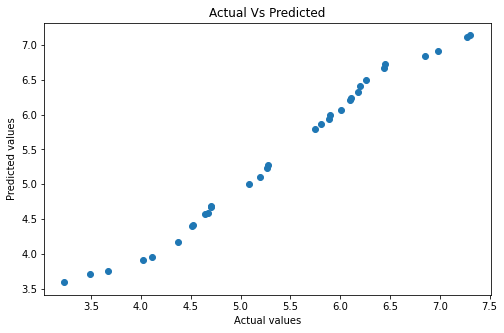

In [161]:
plt.figure(figsize = (8,5))
plt.scatter(ytest,ypred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual Vs Predicted")

So, here we have predicted the happiness score for each rank with the accuracy score 98.21551731579521 i.e 98% which is very good score. 

I Have applied Linear Regression Algorithm. In this, I found that by applying regression, we are getting better accuracy(98.21551731579521)..So the Linear regression Algorithm is best for prediction.

## Prediction using Random Forest Regression

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [163]:
# Train the model on training set

reg = RandomForestRegressor(n_estimators = 100, random_state = 100)
reg.fit(xtrain,ytrain)

RandomForestRegressor(random_state=100)

In [164]:
# Overall score 

reg.score(x,y)*100

99.95608182108347

In [165]:
# Predict the test set result

y_pred = reg.predict(xtest)
print(y_pred)

[6.4328  5.89909 6.19949 4.64345 6.56586 7.37475 6.09014 4.72152 4.15221
 6.17388 5.204   6.00181 4.70255 4.51205 5.88567 3.53943 6.28161 4.53447
 6.11641 4.38509 3.73064 7.2779  4.05694 5.84497 4.67567 3.30131 5.25623
 5.74872 5.28224 5.14467 6.99596 6.8625 ]


In [166]:
reg.predict([[1],[5],[10],[15],[20],[50],[100],[150],[155]])

array([7.69182, 7.4914 , 7.23707, 7.06094, 6.8625 , 6.03229, 4.91896,
       3.42042, 3.12042])

In [167]:
# Evaluate the model

from sklearn.metrics import r2_score
r2_score(ytest,y_pred)*100

99.8893567501516

In [168]:
a = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred, 'Difference': ytest-y_pred})
a[0:20]

Actual  Predicted  Difference
26    6.436    6.43280     0.00320
54    5.893    5.89909    -0.00609
37    6.198    6.19949    -0.00149
112   4.639    4.64345    -0.00445
24    6.446    6.56586    -0.11986
7     7.307    7.37475    -0.06775
45    6.100    6.09014     0.00986
107   4.707    4.72152    -0.01452
137   4.107    4.15221    -0.04521
40    6.174    6.17388     0.00012
90    5.197    5.20400    -0.00700
51    6.008    6.00181     0.00619
108   4.700    4.70255    -0.00255
119   4.516    4.51205     0.00395
56    5.888    5.88567     0.00233
147   3.488    3.53943    -0.05143
33    6.262    6.28161    -0.01961
118   4.519    4.53447    -0.01547
44    6.105    6.11641    -0.01141
128   4.374    4.38509    -0.01109

In [169]:
b = xtest
b[0:20]

Overall rank
26             27
54             55
37             38
112           113
24             25
7               8
45             46
107           108
137           138
40             41
90             91
51             52
108           109
119           120
56             57
147           148
33             34
118           119
44             45
128           129

In [170]:
pd.merge(b,a, left_index=True, right_index=True)

Overall rank  Actual  Predicted  Difference
26             27   6.436    6.43280     0.00320
54             55   5.893    5.89909    -0.00609
37             38   6.198    6.19949    -0.00149
112           113   4.639    4.64345    -0.00445
24             25   6.446    6.56586    -0.11986
7               8   7.307    7.37475    -0.06775
45             46   6.100    6.09014     0.00986
107           108   4.707    4.72152    -0.01452
137           138   4.107    4.15221    -0.04521
40             41   6.174    6.17388     0.00012
90             91   5.197    5.20400    -0.00700
51             52   6.008    6.00181     0.00619
108           109   4.700    4.70255    -0.00255
119           120   4.516    4.51205     0.00395
56             57   5.888    5.88567     0.00233
147           148   3.488    3.53943    -0.05143
33             34   6.262    6.28161    -0.01961
118           119   4.519    4.53447    -0.01547
44             45   6.105    6.11641    -0.01141
128           129   4.374    4.38509    -0.01109
145           146   3.663    3.73064    -0.06764
8               9   7.278    7.27790     0.00010
139           140   4.015    4.05694    -0.04194
59             60   5.809    5.84497    -0.03597
111           112   4.668    4.67567    -0.00767
152           153   3.231    3.30131    -0.07031
85             86   5.261    5.25623     0.00477
62             63   5.743    5.74872    -0.00572
83             84   5.274    5.28224    -0.00824
94             95   5.082    5.14467    -0.06267
16             17   6.985    6.99596    -0.01096
19             20   6.852    6.86250    -0.01050

### Visualize the result

Text(0.5, 1.0, 'Actual Vs Predicted')

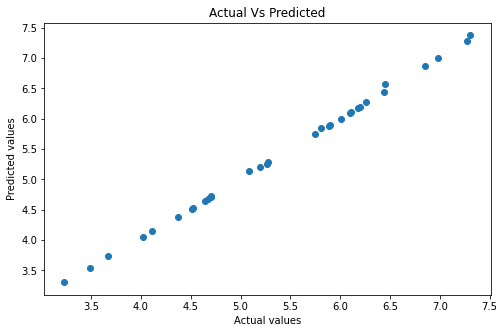

In [171]:
plt.figure(figsize = (8,5))
plt.scatter(ytest,y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual Vs Predicted")

So, we have predicted the happiness score for each rank with the accuracy score 99.87229962067502 i.e 99% using Random Forest Regression algorithm which provides us better accuracy.